## Introduction

Predict house prices. Familiarize myself with Python data analysis.

*Note: Codes may also come from other kernels for practice/workflow

## Modeling Framework

1. Framing the problem
    - What are we trying to solve?
    - Understand the problem and ask questions
2. Collecting Relevant Information & Data
    - What type of data do we have?
    - What other requirements are there?
    - What is considered a success for this problem?
3. Process for analysis (Preprocessing & Cleaning)
    - How does the data structure look like?
    - Is the data usable?
    - Can the data be plotted?
    - What changes do we need to do to make the data usable?
    - What type of predictive problem are we trying to answer?
        - Models we can use
        - What are the model inputs? 
            - Figure out the data inputs needed for the model to work.
    - Check for common errors like missing values, corrupted values, dates
4. Explore the data (Exploratory Data Analysis)
    - How does the data look like?
    - Are there any patterns?
        - Identify using summary statistics, plotting, counting, etc.
    - Familiarizing process
5. Feature Engineering (Applied Machine Learning)
    - Can we create more features that will be helpful to the model?
6. Statistical Analysis
    - Univariate, bivariate, multivariate analysis of features
        - Analysis of a single feature
        - Analysis of two features together
        - Analysis of more than two features together
7. Modeling & Scoring
    - Splitting the data into train/test
    - Standardizing data
    - What models are appropriate?
        - Regression
    - Pre-Tuning
    - Cross-Validating
    - Hyperarameter Tuning
    - Tuned Models Using Best Hyperparameters
    - Comparison: Pre-Tuning vs. CV vs. Tuned Model vs. CV Tuned 
8. Evaluation
    - How accurate are the models?
    - What evaluation metric is appropriate?
    - Is the model good enough?
    - Iteration needed?

### Framing the problem

Predict house prices in Ames, Iowa.

#### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
    
### Method

Since we are predicting price (numerical), this will be a regression problem so we will focus on algorithms like linear regression, random forest, boosting algorithms (gradient, light, extreme gradient), regularized linear algorithms (ridge, lasso, elastic-net), etc. We can attempt to try methods that will use meta-learners called stacking or blending.
- Evaluation metric used will be Root-Mean-Squared-Error (RMSE) between the SalePrice feature and the actual SalePrice on a log scale to enture that errors predicting expensive houses and cheap houses will affect our score equally

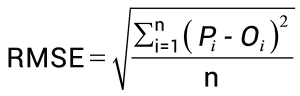

In [1]:
from IPython.display import Image
url = 'https://gisgeography.com/wp-content/uploads/2014/07/rmse-formula1-300x96.png'
Image(url, width=300, height=350)

### Get relevant data

In [2]:
# Set directory
import os
path = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\Data'

# Move to directory with the data
os.chdir(path)

# Check
os.getcwd()
os.listdir()

['01-ign.csv',
 '02-winequality-red.csv',
 '02-winequality-white.csv',
 '03-thanksgiving-2015-poll-data.csv',
 '05-ibm-sales-loss.csv',
 '07-test.csv',
 '07-train.csv',
 '09-house-test.csv',
 '09-house-train.csv']

### Import libraries & data

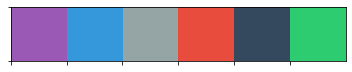

In [3]:
# Toolbox 101
import pandas as pd
import pandas_profiling
import numpy as np
import random as rand
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats

# # Models (type it all out for practice)
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import GradientBoostingRegressor

# from sklearn.linear_model import Ridge
# from sklearn.linear_model import RidgeCV
# from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import ElasticNetCV
# from sklearn.svm import SVR # SVC = classification

# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor, plot_importance 
# import lightgbm as lgb

# Evaluation
from sklearn.metrics import mean_squared_error #RMSE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

# Preset data display
pd.options.display.max_seq_items = 5000
pd.options.display.max_rows = 5000

# Set palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette(flatui))
#34495e

In [4]:
# Import data
train = pd.read_csv('09-house-train.csv')
test = pd.read_csv('09-house-test.csv')

In [5]:
# Check data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Drop Id column since that is not going to be useful in modeling.

In [7]:
# Drop
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [8]:
# Check
train.iloc[0:5,:3]

,MSSubClass,MSZoning,LotFrontage
0,60,RL,65.0
1,20,RL,80.0
2,60,RL,68.0
3,70,RL,60.0
4,60,RL,84.0


### Preprocessing / Cleaning
Are we able to use the data right away? Are there any null values? Is the data clean?

In [9]:
'''

Some functions to start off with:

train.sample()                                           
train.describe()
    train.describe(include=['O'])
    train.describe(include='all')
train.head()
train.tail()
train.value_counts().sum()
train.isnull().sum()
train.count()
train.fillna()
    train.fillna(train[col].mode(), inplace=True)
train.mean()
train.median()
train.mode()
train.shape
train.info()

'''

"\n\nSome functions to start off with:\n\ntrain.sample()                                           \ntrain.describe()\n    train.describe(include=['O'])\n    train.describe(include='all')\ntrain.head()\ntrain.tail()\ntrain.value_counts().sum()\ntrain.isnull().sum()\ntrain.count()\ntrain.fillna()\n    train.fillna(train[col].mode(), inplace=True)\ntrain.mean()\ntrain.median()\ntrain.mode()\ntrain.shape\ntrain.info()\n\n"

In [10]:
# Get data shape, info, columns, & dimensions
print ("*"*40)
print('********** train shape: ' + str(train.shape) + '*'*10)
print (train.info())
print ("*"*40)
print('********** test shape: ' + str(test.shape) + '*'*10)

****************************************
********** train shape: (1460, 80)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl        

There are a total of 80 columns and 1460 rows of data in the training set.

### Feature Descriptions
Here's a brief version from the website.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


### Are there any null values? Show only column names with a null data value

In [11]:
# Get null pct and counts
null_cols = pd.DataFrame(train.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
null_cols_pct = pd.DataFrame(round(train.isnull().sum().sort_values(ascending=False)/len(train),2)*100, columns=['Null Data Pct'])

# Combine horizontally (axis=1) into a dataframe with column names (keys=[]) then to a data frame
null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

all_nulls = null_cols_df[null_cols_df['Null Data Pct']>0]

print('There are', len(all_nulls), 'columns with missing values.')
all_nulls

There are 18 columns with missing values.


,Null Data Count,Null Data Pct
PoolQC,1453,100.0
MiscFeature,1406,96.0
Alley,1369,94.0
Fence,1179,81.0
FireplaceQu,690,47.0
LotFrontage,259,18.0
GarageType,81,6.0
GarageCond,81,6.0
GarageFinish,81,6.0
GarageQual,81,6.0


### Plot the nulls

Text(0.5, 1.0, 'Percent of Missing Data by Feature')

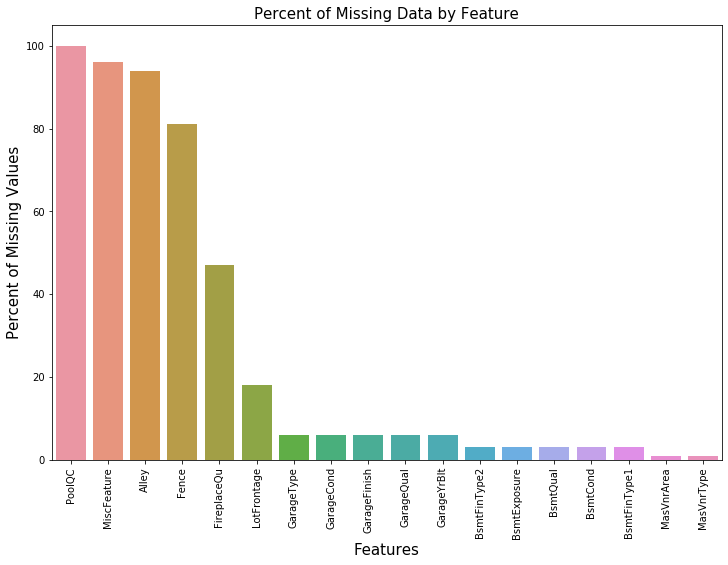

In [12]:
# Create figure space
plt.figure(figsize=(12,8))

# Create plot
sns.barplot(x=all_nulls.index,
            y='Null Data Pct',
            data=all_nulls)

# Set plot features
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent of Missing Data by Feature', fontsize=15)

Looks like 5 features have 45% of NA data or more. We can try to explore the features to see if it can be useful if it's possible. PoolQC may be removeds since there the entire column has NA data.

### Ways to clean up null values
There are several methods on how to handle missing values. There are always some instances where a particular element is absent. It could be due to corrupt data, failure to load the information, never inputted in the first place, or other invalid methods of data collection. It's extremely helpful to know a few methods on how to handle the NULL/NaN values. Pandas library also provides a dropna() function that can be used to drop other columns or rows of missing data.

Some methods of dealing with NA values below:
1. Removing the rows with missing values using dropna() function
    - Use the inplace parameter: if True, do operation inplace and return None
    - Use the axis parameter: drop labels from the index (if 0) or columns (if 1)
2. Impute missing values using fillna()
    - Constant value that has meaning within the domain; ex: 0 for not present or 'Missing' for categorical
    - Value from another randomly selected record (could be random or have some business insight to add a new data point)
    - Mean, median, mode
    - Value estimated by a predictive model (random forest)
3. Binning
    - Binning the vfalues that are not present which could provide insight
4. Ignore and leave it as it is
    - Sometimes it's useful to know that there is a missing value

### How does the SalePrice distribution look like?

Let's take a look at both the SalePrice feature & create a log(SalePrice) since that's what we are going to be measured by. First let's make a data frame to store the two features.

In [13]:
# Create a dataframe to store the values
saleprice_df = pd.concat([train.SalePrice, np.log(train.SalePrice+1).rename('LogSalePrice')],
                          axis=1, names=['SalePrice', 'LogSalePrice'])
saleprice_df.head()

,SalePrice,LogSalePrice
0,208500,12.247699
1,181500,12.109016
2,223500,12.317171
3,140000,11.849405
4,250000,12.429220


### Plot SalePrice below first then find outliers to drop

In [14]:
# Drop
train = train.drop(train[(train.SalePrice>450000)].index)

# Drop column example
# .drop('Cabin', axis=1, inplace=True)

Text(0.5, 1.0, 'LogSalePrice Distribution')

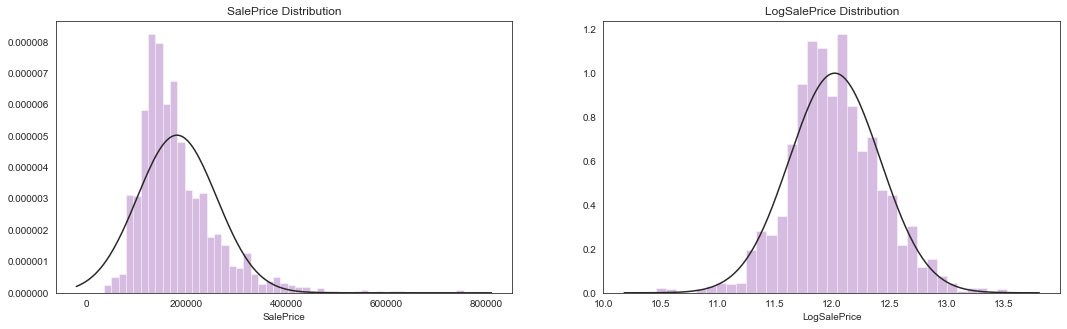

In [15]:
sns.set_style("white")
sns.set_color_codes(palette='deep')

# Create figure space
fig, ax = plt.subplots(figsize=(18,5), ncols=2, nrows=1)

# Create a distribution plot
ax1 = sns.distplot(saleprice_df.SalePrice, kde=False, fit=norm, ax=ax[0])
ax2 = sns.distplot(saleprice_df.LogSalePrice, kde=False, fit=norm, ax=ax[1])

# Set plot features
ax1.set_title('SalePrice Distribution')
ax2.set_title('LogSalePrice Distribution')

### Using probplot()


 mu = 177269 and sigma = 69925



Text(0.5, 1.0, 'SalePrice distribution')

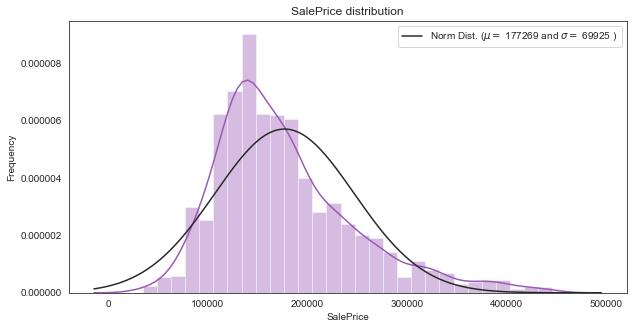

In [16]:
# Create figure space
plt.figure(figsize=(10,5))

# Create plot
sns.distplot(train['SalePrice'] , fit=norm)

# Get the fitted parameters (feels off without the params somewhere visible)
mu, sigma = norm.fit(train['SalePrice'])
print( '\n mu = {:.0f} and sigma = {:.0f}\n'.format(mu, sigma))

# Plot distribution
plt.legend(['Norm Dist. ($\mu=$ {:.0f} and $\sigma=$ {:.0f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [17]:
# Skewness and kurtosis
print('Skewness: %f' % train['SalePrice'].skew())
print('Kurtosis: %f' % train['SalePrice'].kurt())

Skewness: 1.110038
Kurtosis: 1.332175


### Skewness
Doc Def: For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

### Kurtosis
Doc Def: Kurtosis is the fourth central moment divided by the square of the variance. If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution.

If bias is False then the kurtosis is calculated using k statistics to eliminate bias coming from biased moment estimators

So there is a unimodal left skew on the SalePrice feature. The shape of the LogSalePrice feature looks approximately normally distributed, which is a good thing. It's a lot easier to work with especially with outliers.

### Distribution Shapes
A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions, because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak which is less than the median.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions since there is a long tail in the positive direction on the number line. The mean is also to the right of the peak which is larger than the median.

#### Here's an image below indicating how each skew would look like and the summary statistic values would lie.

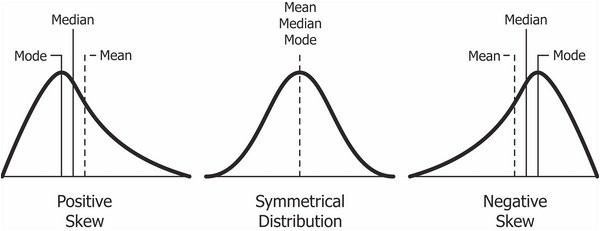

In [18]:
url = 'https://i.imgur.com/yIqX5W5.jpg'
Image(url, width=500, height=500)

In [19]:
# Return the natural logarithm of one plus the input array, element-wise.
train['LogSalePrice'] = np.log1p(train.SalePrice)

### Probability (QQ Plot)

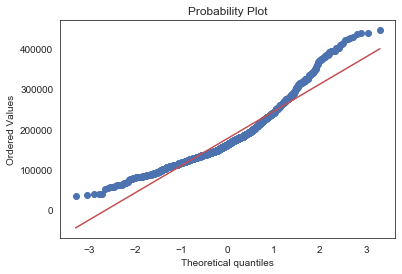

In [20]:
stats.probplot(train['SalePrice'], plot=plt)
plt.show();

To meet the linear assumptions, we need this qq-plot to be closer to a diagonal shape. We see that it's curve at the tails which means it's not quite as linear as we want it to be. That's why we also have a transformed version of the SalePrice.

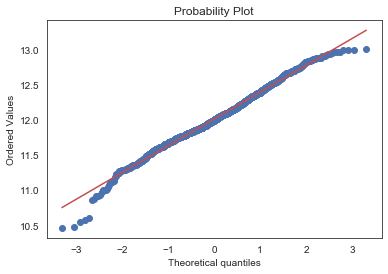

In [21]:
stats.probplot(np.log(train.SalePrice), plot=plt)
plt.show();

This looks a lot better and we can see that it's extremely close alongside the red line. We can also do this with other variables as well.

### Exploratory Data Analysis

The difficulty here isn’t coming up with ideas to start; it’s coming up with ideas that are likely to turn into useful insight.

We will begin plotting and identifying features that may be relevant to our dependent variable. It wil be easier to play around with the features if we split it
by data type: numerical/integer and character/factor.

This section is going to be particularly long as I am going to go through a good amount of features for practice.

### Some useful functions and examples:

Using map() to transform

- level_map = {1: 'high', 2: 'medium', 3: 'low'}

- df['c_level'] = df['c'].map(level_map)
    
Using value_count()

- df['c'].value_counts()

- There’re some useful tricks / arguments of it:
    1. normalize = True: if you want to check the frequency instead of counts.
    2. dropna = False: if you also want to include missing values in the stats.
    3. df['c'].value_counts().reset_index(): if you want to convert the stats table into a pandas dataframe and manipulate it
    4. df['c'].value_counts().reset_index().sort_values(by='index') : show the stats sorted by distinct values in column ‘c’ instead of counts.

- df['c'].value_counts().sort_index()) # Using without .reset_index()

Selecting rows with certain IDs

- df_filter = df['ID'].isin(['A001','C022',...])
- df[df_filter]

In [22]:
# Count data types in the train dataset
train.dtypes.value_counts()

object     43
int64      34
float64     4
dtype: int64

In [23]:
# Find numeric features
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = train.select_dtypes(include=num_dtypes)

# Find all other features
col_data = train.select_dtypes(include=['object'])

In [24]:
print(num_data.head(2))
print(col_data.head(2))

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  OpenPorchSF  \
0          2003       196.0         706           0  ...           61   
1          1976         0.0         978           0  ...            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   

   SalePrice  LogSalePrice  
0     208500     12.247699  
1     181500     12.109016  

[2 rows x 38 columns]
  MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl   

Let's plot the numerical features now and see if there are multicollinearity within the dataset. Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent (causing bias if left alone). If the degree of correlation between the variables is high enough, it can cause problems when you fit a model and interpret the results (skew).

We can take a look at a correlation plot to identify variables that fit this category or check if the variance inflation factor (VIF) > 10 (highly correlated).

How do we choose between which variable should we keep if they are correlated? We can apply some statistical tests to see which variable may be more beneficial
for the dependent variable. Some tests involve one-way t-tests (2 independent variables) and ANOVA (multiple variables), choosing the one with the highest R^2 value or a simple regression and check the values after.

Another way is to do some form of dimensionality reduction. Principal component analysis is a popular method to reduce dimensionality when there are a lot of features.

One way I have not tested yet is to combine both variables to create a new super variable that be beneficial for the model. Beware that combining may have same results.

Now let's do some correlation analysis and see if there is multicollinearity involved.


### Correlation to LogSalePrice

In [25]:
# Correlation to LogSalePrice feature
pd.DataFrame(abs(num_data.corr()['LogSalePrice']).sort_values(ascending=False))

,LogSalePrice
LogSalePrice,1.000000
SalePrice,0.963462
OverallQual,0.805845
GrLivArea,0.677566
GarageCars,0.671648
GarageArea,0.639398
YearBuilt,0.593703
TotalBsmtSF,0.587557
FullBath,0.579701
1stFlrSF,0.570105


YrSold has the highest correlation based off of the pearson's correlation which is the standard correlation coefficient. The second is YrBuilt, which makes sense when the year built is closely correlated to the year sold.

- In statistics, the correlation coefficient r measures the strength and direction of a linear relationship. don't get this mixed upwith coefficient of determination which is the r^2 which shows percentage of variation in y which is explained by the x variables.
    - when Pearson's r is close to 1 that means there is a strong relationship between the two variables
    - when Pearson's r is close to 0 that means there is a weak relationship between the two variables

### Coefficient of Determination (R-Squared)

In [26]:
# Top Features
r_squared = num_data.corr()**2
r_squared.LogSalePrice.sort_values(ascending=False)

LogSalePrice     1.000000
SalePrice        0.928259
OverallQual      0.649386
GrLivArea        0.459095
GarageCars       0.451111
GarageArea       0.408830
YearBuilt        0.352483
TotalBsmtSF      0.345223
FullBath         0.336053
1stFlrSF         0.325020
YearRemodAdd     0.322418
GarageYrBlt      0.291634
TotRmsAbvGrd     0.254633
Fireplaces       0.226382
MasVnrArea       0.156627
BsmtFinSF1       0.120844
LotFrontage      0.113126
WoodDeckSF       0.108095
OpenPorchSF      0.095366
HalfBath         0.091148
2ndFlrSF         0.089362
LotArea          0.059074
BsmtFullBath     0.055797
BsmtUnfSF        0.046101
BedroomAbvGr     0.043440
KitchenAbvGr     0.021946
EnclosedPorch    0.021108
ScreenPorch      0.010309
MoSold           0.005375
MSSubClass       0.005004
LowQualFinSF     0.003772
3SsnPorch        0.003725
PoolArea         0.001636
YrSold           0.001587
OverallCond      0.001047
MiscVal          0.000335
BsmtHalfBath     0.000092
BsmtFinSF2       0.000043
Name: LogSal

The coefficient of determination provides a 'goodness of fit' measure for the predictions to the observations. This is a value between 0 and 1. It's the proportion of the variance in the dependent variable (y) that is predictable from the independent variable (x).

There looks like ba a handful of numerical features that are highly correlated to the LogSalePrice feature. YrSold has a 99% explanation for the dependent variable. This could be an example of multicollinearity. 

### Sample heatmap viz - changing a particular value

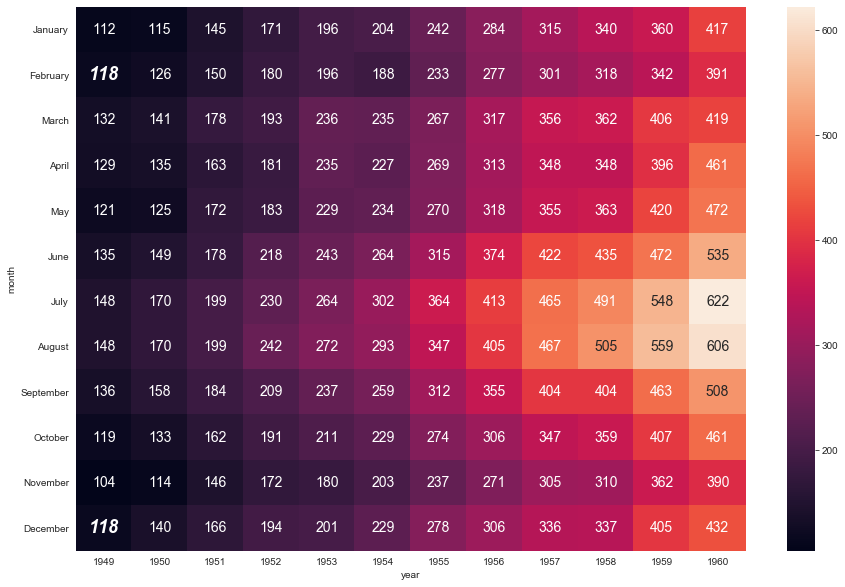

In [27]:
plt.figure(figsize=(15, 10))
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights, annot=True, fmt="d")

for text in ax.texts:
    text.set_size(14)
    if text.get_text() == '118':
        text.set_size(18)
        text.set_weight('bold')
        text.set_style('italic')

### Create a heatmap for the dataset

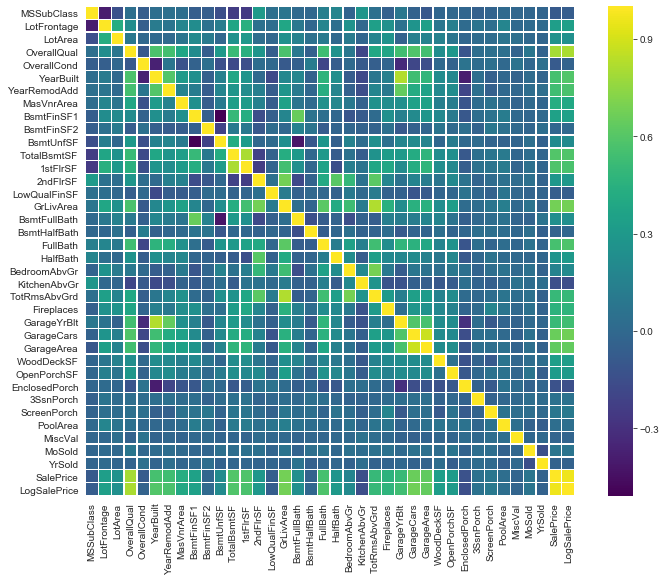

In [28]:
# Create a figure space
plt.subplots(figsize=(12,9))

# Create matrix
corr_plot = sns.heatmap(num_data.corr(),
#                         annot=True,
                          cmap='viridis', # YlGnBu, RdBu_r
                          linewidths=0.20,
                          linecolor='white',
                          vmax=1,
                          square=True,
                          fmt='.1g',
                          annot_kws={"size": 12})
corr_plot

This is kind of hard to see with all of the variables but anything that is close to yellow or dark blue indicates a decent positive or negative correlation.

Let's take a look visually now that we have all values in the feature populated. We can use matplotlib and its functions to:
1. Create a figure space
2. Plot the data
3. Update any figure settings

**Before modeling, create plots togther in 1 figure space that will pair up the train vs test distributions to see if distributions vary a lot later.**

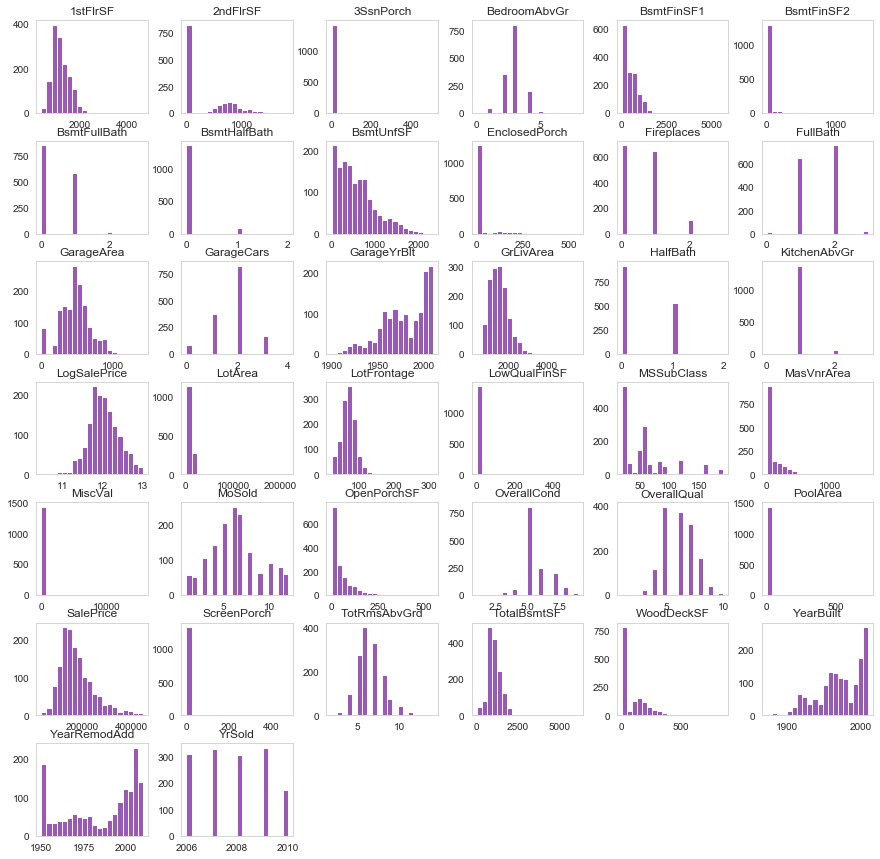

In [29]:
sns.set_style('whitegrid')
ax = train.hist(bins=20, figsize=(15,15), grid=False)
plt.show();

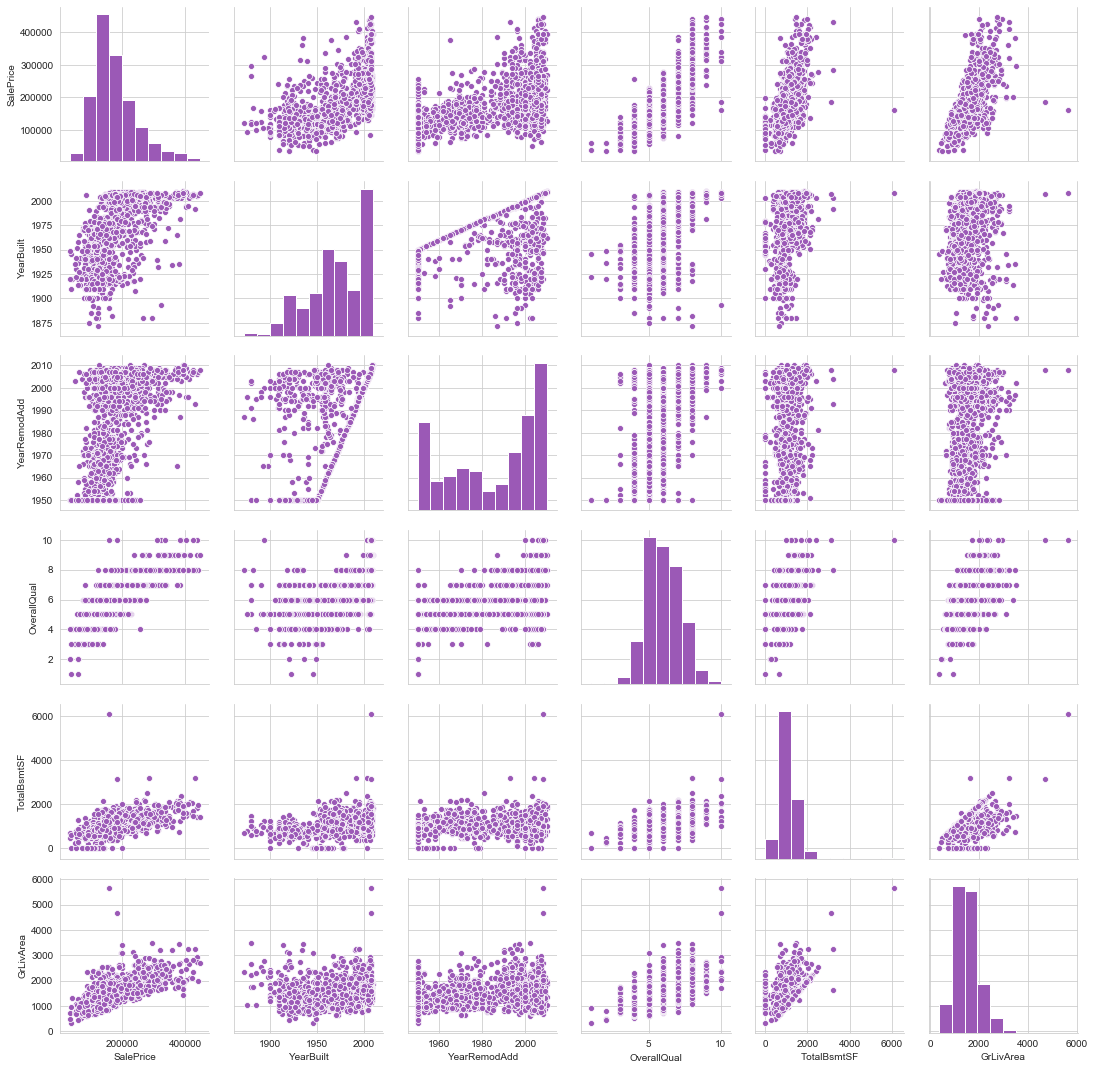

In [30]:
# Some numerical features
plot_list = ['SalePrice', 'YearBuilt', 'YearRemodAdd', 'OverallQual', 'TotalBsmtSF', 'GrLivArea']

# Plot pairplot
sns.pairplot(train[plot_list])

All the features seem to have some slight positive correlation to the sales price as the values move towards the right of the x-axis. The newer the year the house was built to the GrLiv/Area feature increases the sale price.

### OverallQual feature

Text(0.5, 1.0, 'Overall Quality vs. SalePrice')

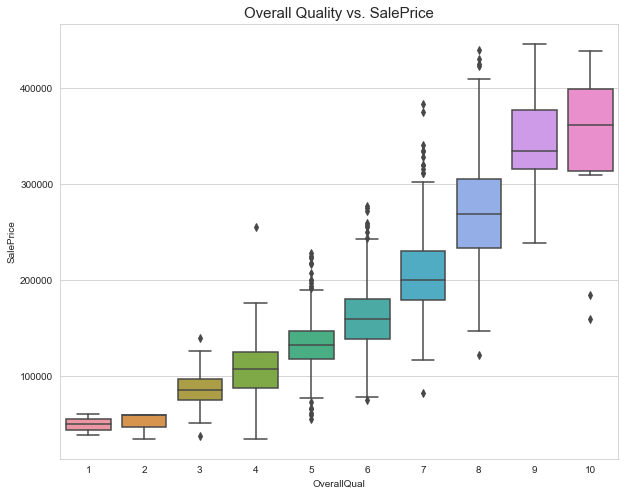

In [31]:
# Create figure space
fig, ax = plt.subplots(figsize=(10,8))

# Create boxplot
ax = sns.boxplot(x=train.OverallQual,
                 y=train.SalePrice,
                 data=train)

# Set plot features
ax.set_title('Overall Quality vs. SalePrice', fontsize=15)

As expected, the sale price will be a lot higher when the overall quality is large as well. Who would want to pay a hefty price for a low quality house?

### YearBuilt feature

[[]]

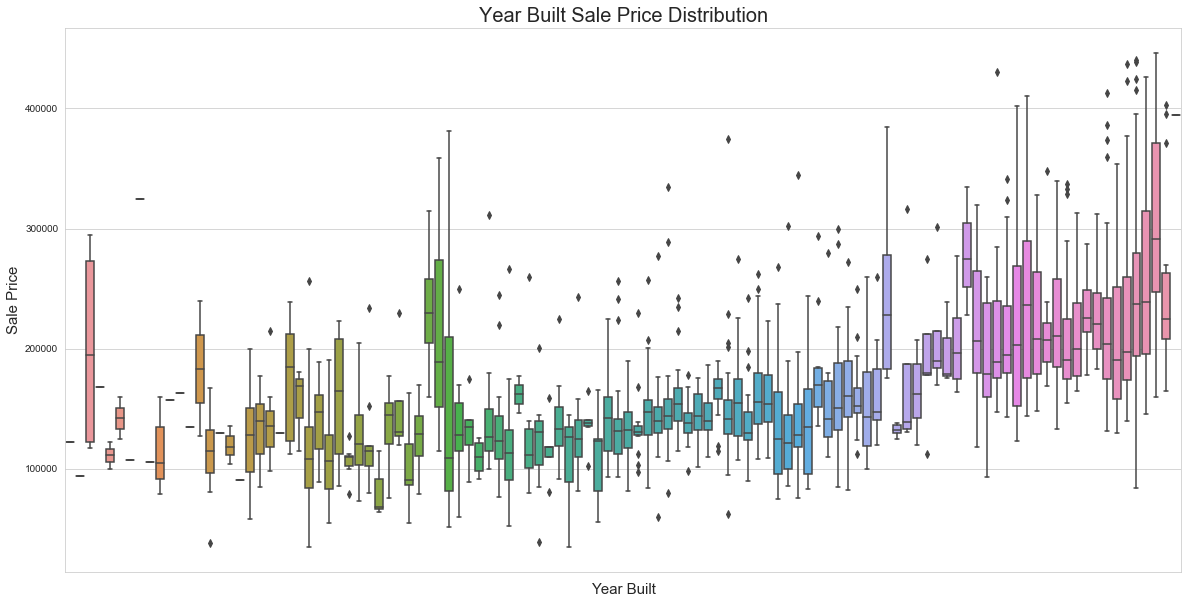

In [32]:
# Create figure space
fig, ax = plt.subplots(figsize=(20,10))

# Create boxplot
ax = sns.boxplot(x=train.YearBuilt,
                 y=train.SalePrice,
                 data=train)

# Set plot features
ax.set_title('Year Built Sale Price Distribution', fontsize=20)
ax.set_xlabel('Year Built', fontsize=15)
ax.set_ylabel('Sale Price', fontsize=15)
ax.set(xticklabels=[])

We can see the mean/median values of prices going up as the year built is more recent compared to the past. This is useful as it gives us an idea that more modern homes are going to be more costly due to many home factors that we are going to plot out like square footage.

### Scatter relationship between YrBuilt & SalePrice

Need statsmodels

(1860, 2020)

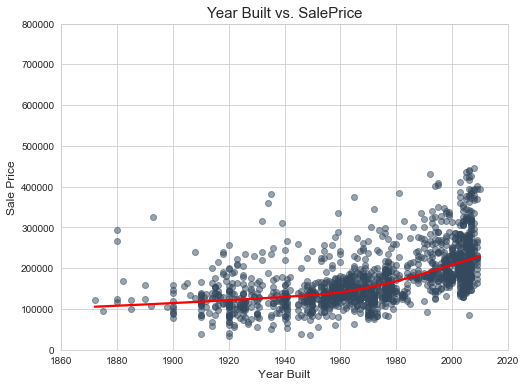

In [33]:
# Remove white grid
sns.set_style('whitegrid')

# Set figure space
fig = plt.figure(figsize=(8, 6))

# Create scatterplot with a loess line
import statsmodels
sns.regplot(x='YearBuilt', y='SalePrice', data=train, lowess=True,
            color='#34495e', scatter=True,
            line_kws={'color': 'red'},
            scatter_kws={'alpha': 0.50})

# sns.scatterplot(x='YearBuilt',
#                 y='SalePrice',
#                 data=train)

# Set plot features
plt.title('Year Built vs. SalePrice', fontsize=15)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.ylim(0, 800000)
plt.xlim(1860, 2020)

Here I plotted the data and a linear regression model fit since it's always good to see how well our independent variables are correlated with our dependent variable.

### Create a function to plot histogram and probability plot (hist_qq_plot())

In [34]:
# Define the function
def hist_qq_plot(var):
    # Get normal distribution 
    sns.distplot(var, fit=norm)
    fig = plt.figure()
    qq = stats.probplot(var, plot=plt,)
#     qq.get_lines()[0].set_markerfacecolor('#34495e')

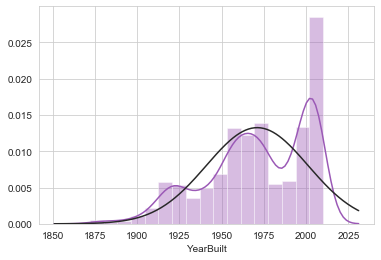

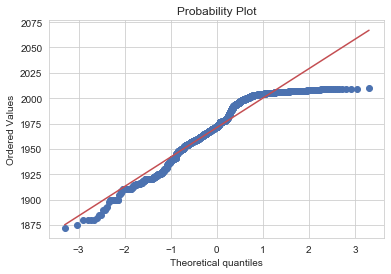

In [35]:
hist_qq_plot(train.YearBuilt)

Looks like the YearBuilt feature is left skewed (tail on the left). 

We can create another feature that will be the log of the value if it was not a date value. I would want to read more about logging every feature that is not normal for linear algorithms. We wouldn't need to if we were using a random forest for example since it can handle non-linearity but let's see how the log value looks anyways.

### What is a linear regression?

A linear regression is type of model that looks at the relationship between a dependent variable and one or more independent variable(s). The overall idea on how it's used is to see help answer the question: do the predictor variables do a good job in predicting the outcome? The simpleest form of the linear equation is shown below. Our dependent variable (SalePrice) is being predicted by the linear component (YearBuilt + YearBuilt coefficient + constant) and an error component (random, could not be modeled).

Assumptions for the regression to work
- Linear: Needs a linear relationship between the dependent and independent variables
    - Check by plotting X to y
- Normality of Residuals: Requires error term to be normally distributed
    - Check by qq-plot
- Homoscedasticity: Assumes that residuals are approximately equal for all predicted dependent variable values (variance of residual is the same for any value of X)
    - Check by plotting fitted values & residuals
- Multicollinearity: Variance Inflation Factor (VIF) – independent variables must not be highly correlated with each other
    - Check by correlation matrix or statistical tests
- Independence: Observations are independent of each other
    - Check by correlation matrix

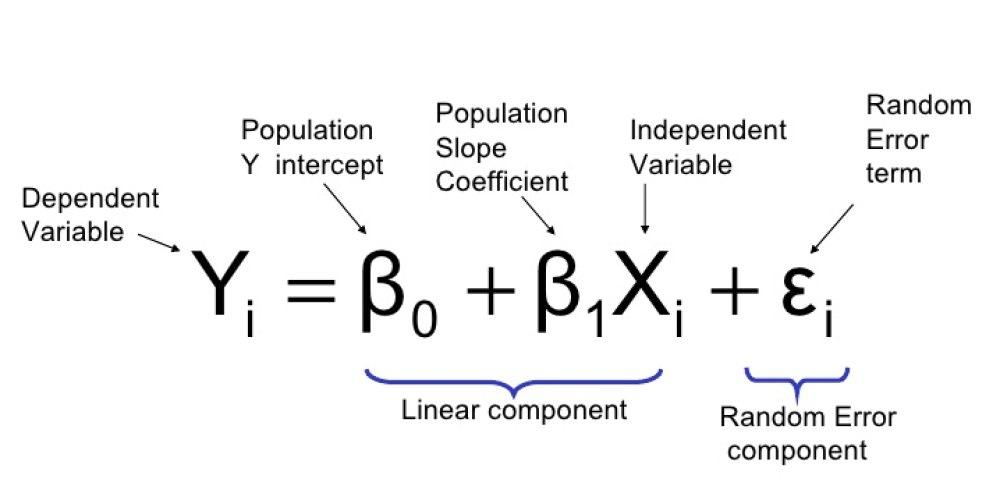

In [36]:
url = 'https://serving.photos.photobox.com/3262242285a81460d733332055b13e4ce0aaffc306c6d4165167c76251183608696600e0.jpg'
Image(url, width=500, height=500)

### Month Sold feature

Text(0, 0.5, 'Sale Price')

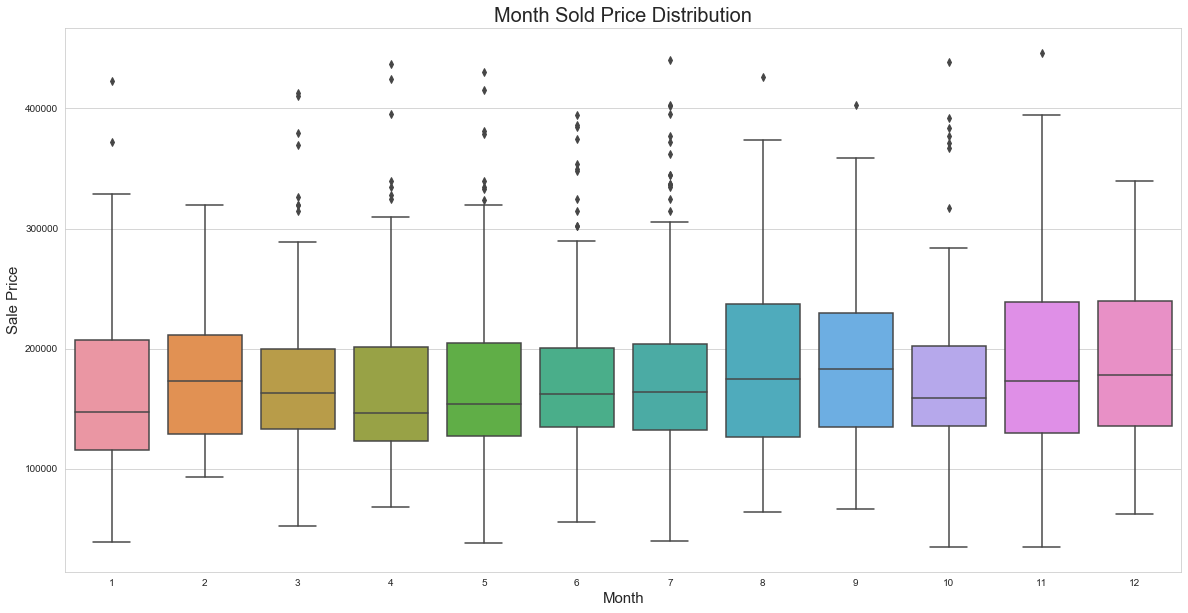

In [37]:
# Create figure space
fig, ax = plt.subplots(figsize=(20,10))

# Create boxplot
ax = sns.boxplot(x=train.MoSold,
                 y=train.SalePrice,
                 data=train)

# Set plot features
ax.set_title('Month Sold Price Distribution', fontsize=20)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Sale Price', fontsize=15)

Although the distribution looks pretty even throughout the year, there are a lot more outliers as we approach spring throughout summer. The outliers are all higher prices with none under the first quartile value. 

I can make some assumptions that prices are likely going to be higher in the summer or that people are more likely going to purchase in the summer/spring time.

Text(0, 0.5, 'Density')

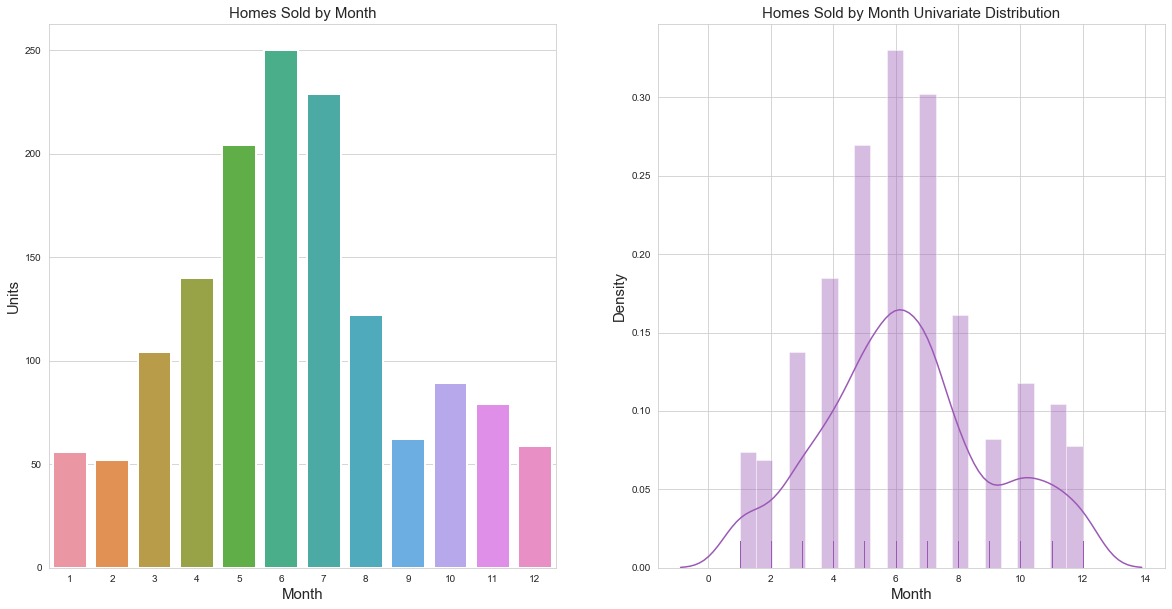

In [38]:
# Set figure space
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

# Create countplot()
ax1 = sns.countplot(x='MoSold',
                   data=train,
                   linewidth=2,
                   ax=ax[0]
                   )

ax2 = sns.distplot(train.MoSold, rug=True, ax=ax[1]) 

# # Plot the distribution with a histogram and maximum likelihood gaussian distribution fit
# ax2 = sns.distplot(train.MoSold, rug=True, fit=norm, kde=False, ax=ax[1]) 

# Set plot features
ax1.set_title('Homes Sold by Month', fontsize=15)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Units', fontsize=15)

ax2.set_title('Homes Sold by Month Univariate Distribution', fontsize=15)
ax2.set_xlabel('Month', fontsize=15)
ax2.set_ylabel('Density', fontsize=15)

With the outlier data shown in the boxplots earlier combined with these count and density plots, we can confirm a little more on the assumptions that homes are more often bought starting from spring throughout the summer until autumn where it drops significantly. School time also begins in August for semester systems and September for quarter systems. This could be good to pair up with family size data including ages of each family member and any other demographic data.

### Year Sold feature

Text(0, 0.5, 'Sale Price')

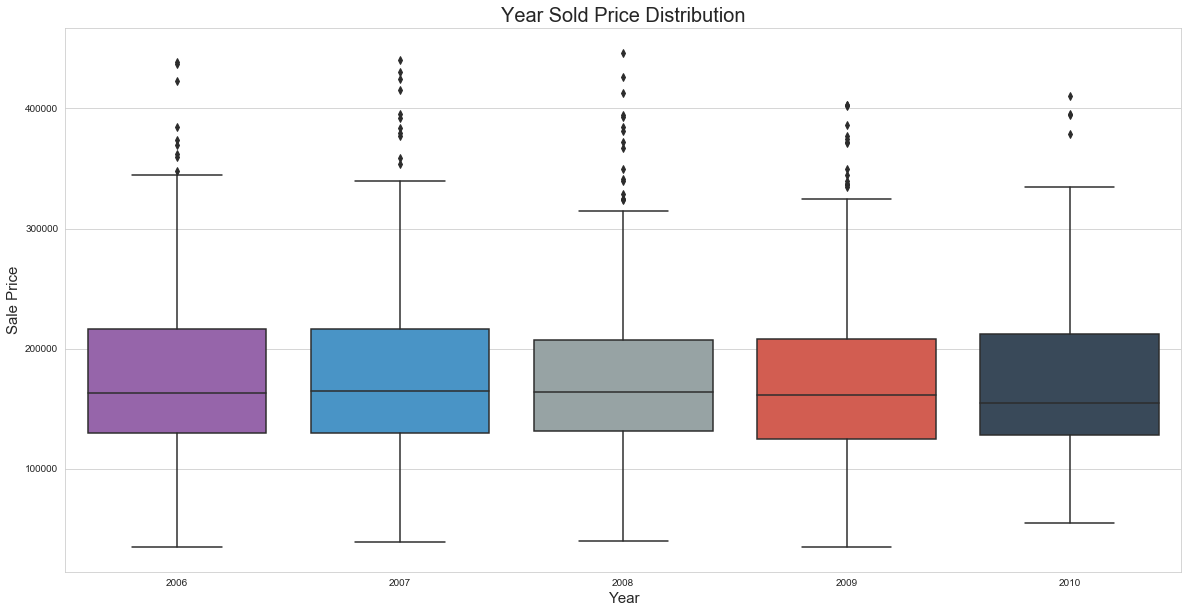

In [39]:
# Create figure space
fig, ax = plt.subplots(figsize=(20,10))

# Create boxplot
ax = sns.boxplot(x=train.YrSold,
                 y=train.SalePrice,
                 data=train)

# Set plot features
ax.set_title('Year Sold Price Distribution', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Sale Price', fontsize=15)

Can't really see anything from this.

### Scatter plot for Year Sold vs. Year Built

Text(0.5, 1.0, 'Year Built vs. Year Sold')

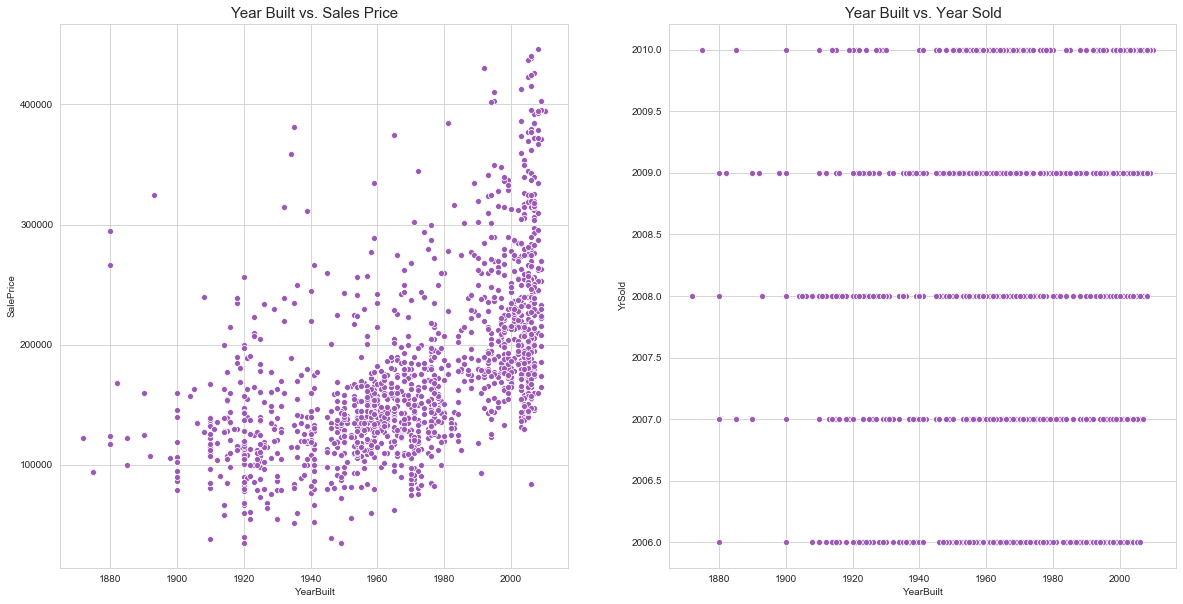

In [40]:
# Create figure space
fig, ax = plt.subplots(figsize=(20, 10), ncols=2)

# Create scatterplot
ax1 = sns.scatterplot(x='YearBuilt',
                      y='SalePrice',
                      data=train,
                      ax=ax[0])

ax2 = sns.scatterplot(x='YearBuilt',
                      y='YrSold',
                      data=train,
                      ax=ax[1])

# Set plot features
ax1.set_title('Year Built vs. Sales Price', fontsize=15)
ax2.set_title('Year Built vs. Year Sold', fontsize=15)

### 1stFlrSF feature

We can start looking at the 1st floor ft^2 feature to see if the larger the sqft value the larger the SalePrice as well. We can combine all of the features that involves area later on to see if it's useful, but for now we will do some individual analyses and plot it out.

In [41]:
# Remove outliers after viewing plots from below
# Drop
train = train.drop(train[(train['1stFlrSF']>2500)].index)

Text(0, 0.5, 'Sale Price')

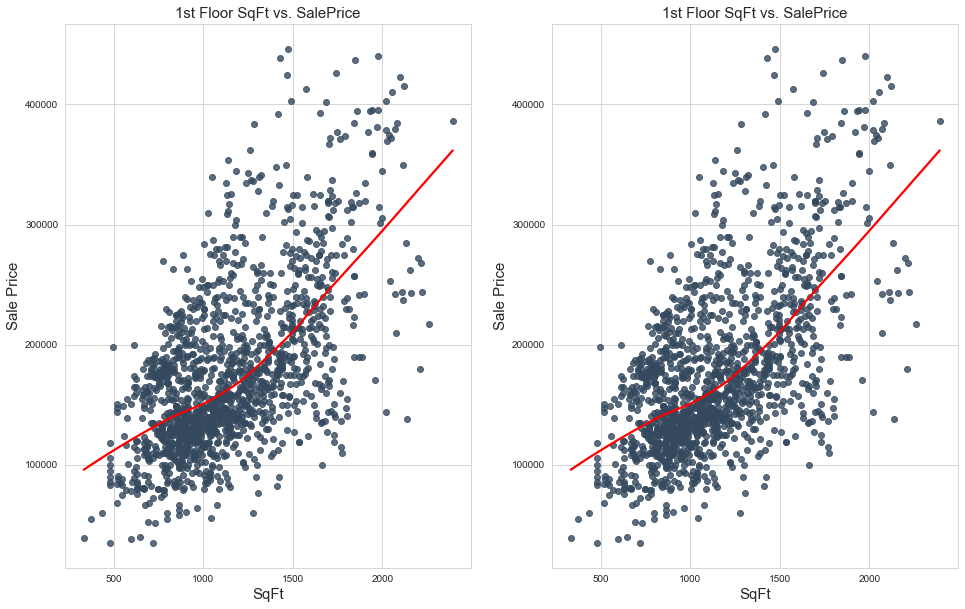

In [42]:
# Set figure space
fig, ax = plt.subplots(figsize=(16,10), ncols=2)

# Create scatterplot with a loess line
ax1= sns.regplot(x='1stFlrSF', y='SalePrice', data=train,
                 lowess=True, color='#34495e', scatter=True,
                 line_kws={'color': 'red'}, ax=ax[0])

# There looks to be a bit of outliers that skews the visual, let's plot without it
ax2 = sns.regplot(x='1stFlrSF', y='SalePrice',
                  data=train[(train['1stFlrSF']<2500)], lowess=True,
                  color='#34495e', scatter=True, line_kws={'color': 'red'},
                  ax=ax[1])

# Set plot features
ax1.set_title('1st Floor SqFt vs. SalePrice', fontsize=15)
ax1.set_xlabel('SqFt', fontsize=15)
ax1.set_ylabel('Sale Price', fontsize=15)

ax2.set_title('1st Floor SqFt vs. SalePrice', fontsize=15)
ax2.set_xlabel('SqFt', fontsize=15)
ax2.set_ylabel('Sale Price', fontsize=15)

There are large outliers that completely skewed the loess line so we plot it without a few large data points to see the a better idea of the relationship between the two features. The removal is only for the plots and not the actual data as we don't know how it may affect the model due to overfitting to the training set once we model it or it can be a good thing, who knows?

This scatterplot shows a moderately strong, positive, linear (the second one kind of curves like a nonlinear) association between SqFt of the 1st floor and the SalePrice. There appears to be some outliers in the data.


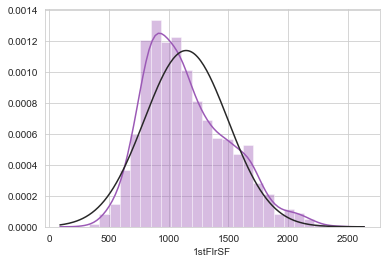

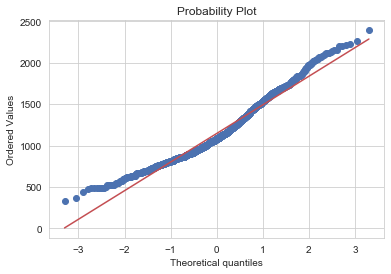

In [43]:
hist_qq_plot((train['1stFlrSF']))

### Log transform the feature

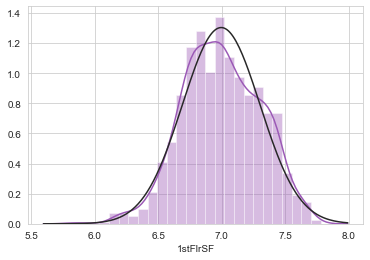

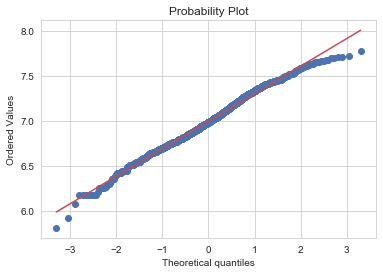

In [44]:
hist_qq_plot(np.log(train['1stFlrSF']))

### GrLivArea feature

In [45]:
# Remove outliers after viewing plots from below
# Drop
train = train.drop(train[(train['GrLivArea']>4000)].index)

(0, 500000)

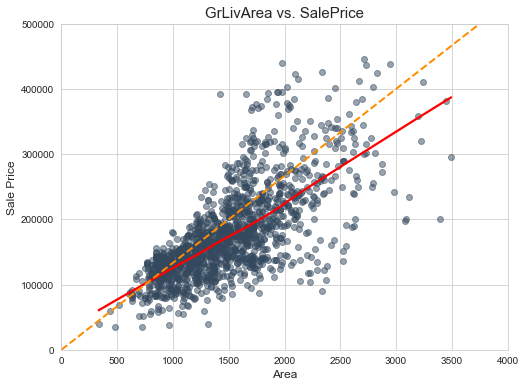

In [46]:
# Set figure space
plt.figure(figsize=(8, 6))

# Create scatterplot with loess
sns.regplot(x='GrLivArea', y='SalePrice', data=train,
            lowess=True, scatter=True, color='#34495e',
            line_kws={'color': 'red'},
            scatter_kws={'alpha': 0.50})

# Plot diagonal line
plt.plot([0, 6000], [0, 800000], 'darkorange', lw=2, linestyle='--')

# Set plot features
plt.title('GrLivArea vs. SalePrice', fontsize=15)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.xlim(0, 4000)
plt.ylim(0, 500000)

The loess line looked extremely positive and linear so I decided to add in a perfect slope line (dotted) to see how close it is to the actual data. It's fairly close in terms of the positiveness and strength since most of the data hovers around the 1,000 to about 2,300 area and just about 80,000 to about 250,000 in price.

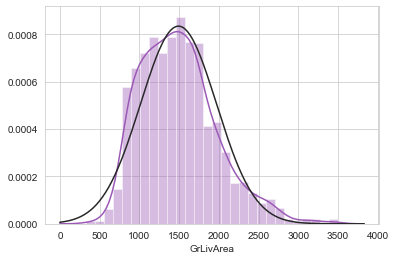

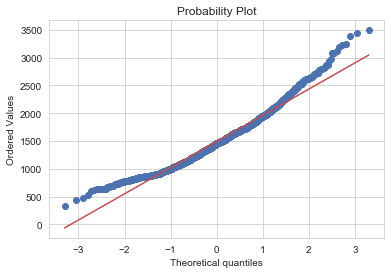

In [47]:
hist_qq_plot((train['GrLivArea']))

### Log transform GrLivArea

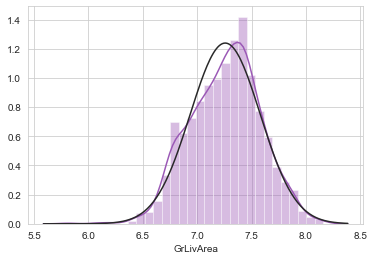

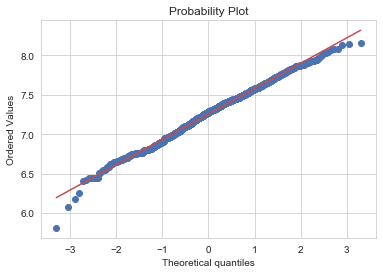

In [48]:
hist_qq_plot(np.log(train['GrLivArea']))

So far for this dataset which has been pretty clean since all of our log values made the data pretty normal for it to meet part of the linearity assumptions. Usually real-world data is not that easy to transform so we have to use methods to combat the non-linearity and use algorithms that can handle such issues.

### TotalBsmtSF vs. SalePrice

There is a single outlier that is over 6000 in total basement sqft so I am going to plot it without it.

In [49]:
# Remove outliers after viewing plots from below
# Drop
train = train.drop(train[(train['TotalBsmtSF']>3000)].index)

Text(0, 0.5, 'Sale Price')

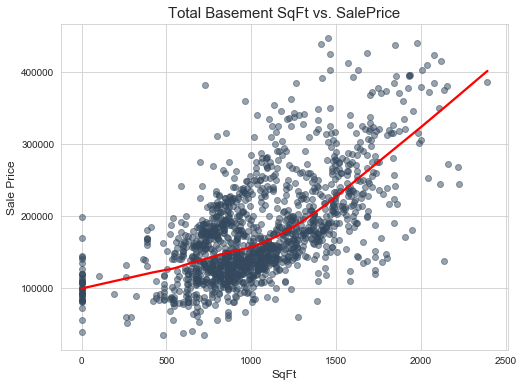

In [50]:
# Set figure space
plt.figure(figsize=(8, 6))

# Create scatterplot with loess
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=train[train.TotalBsmtSF<6000],
            lowess=True, scatter=True, color='#34495e',
            line_kws={'color': 'red'},
            scatter_kws={'alpha': 0.50})

# Plot diagonal line
# plt.plot([0, 6000], [0, 800000], 'darkorange', lw=2, linestyle='--')

# Set plot features
plt.title('Total Basement SqFt vs. SalePrice', fontsize=15)
plt.xlabel('SqFt', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
# plt.xlim(0, 6000)
# plt.ylim(0, 800000)

Basement sqft plot looks very similar to the 1st floor sqft plot from earlier. We can assume that the higher the sqft the higher the sale price. We can confirm this assumption as we continue to visualize more of the features and do some statistical analysis on the features (uni, bi, multi).

There are also 0 sqft for basements for houses without. We can maybe engineer a new feature to flag homes without a basement?

Extra analysis could include looking at the outliers over 3,000 sqft points. A question I would have is what type of home is the data point that is right under 200,000 sale price but has such a high basement sqft? I'll also check the 700,000 sale price homes as well. Checking these outliers also help see if these points are also the same outliers with other features that is plotted. Is there a correlation? If so, why how is it correlated and should we include the data points in the model?

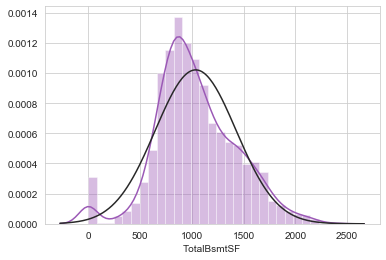

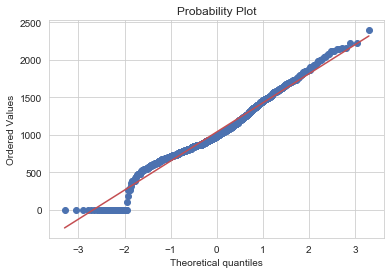

In [51]:
hist_qq_plot((train['TotalBsmtSF']))

### Log transform TotalBsmtSF

log 0 is undefined. The result is not a real number, because you can never get zero by raising anything to the power of anything else. You can never reach zero, you can only approach it using an infinitely large and negative power. So the base b logarithm of zero is not defined. So we have to make sure if we transform the variable, we make sure everything is greater than 0.

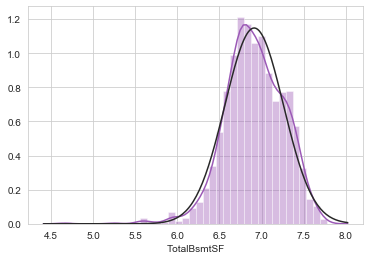

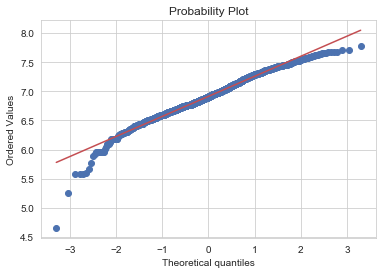

In [52]:
hist_qq_plot(np.log(train[train['TotalBsmtSF']>0].TotalBsmtSF))

### BsmtQual feature

Since there is some sort of linear relationship between price and the basement size, we can take a look at the height as well. This can be separated into two plots where we take a look into account of the height and the size with the quality and price.

Description of each category:
- Ex - Excellent (100+ inches)
- Gd - Good (90-99 inches)
- TA - Typical (80-89 inches)
- Fa - Fair (70-79 inches)
- Po - Poor (<70 inches)

But first, let's create a function called freq_table() that will plot frequency of the labels and a quick bar plot. This was originally used in the Titanic data analysis.


### Define a new function called freq_table()

In [53]:
def pct_bar_labels():
    '''
    Function used to label the relative frequency on top of each bars
    '''
    # Set font size
    fs=15
    
    # Set plot label and ticks
    plt.ylabel('Relative Frequency (%)', fontsize=fs)
    plt.xticks(rotation=0, fontsize=fs)
    plt.yticks([])
    
    # Set individual bar labels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha='center', va='center', xytext=(0, 7), 
        textcoords='offset points', fontsize=fs, color='black')

def freq_table(var):
    '''
    Define plot global variables
    Create a function that will populate a frequency table (%)
    Get counts per feature then get the percentage over the total counts
    '''
    global ax, ax1
    
    # Get Values and pct and combine it into a dataframe
    count_freq = var.value_counts()
    pct_freq = round(var.value_counts(normalize=True)*100, 2)
    
    # Create a dataframe
    df = pd.DataFrame({'Count': count_freq, 'Percentage': pct_freq})
    
    # Print variable name
    print('Frequency of', var.name, ':')
    display(df)
    
    # Create plot
    ax1 = pct_freq.plot.bar(title='Percentage of {}'.format(var.name), figsize=(12,8))
    ax1.title.set_size(15)
    pct_bar_labels()
    plt.show()

Frequency of BsmtQual :


,Count,Percentage
TA,647,46.15
Gd,613,43.72
Ex,107,7.63
Fa,35,2.50


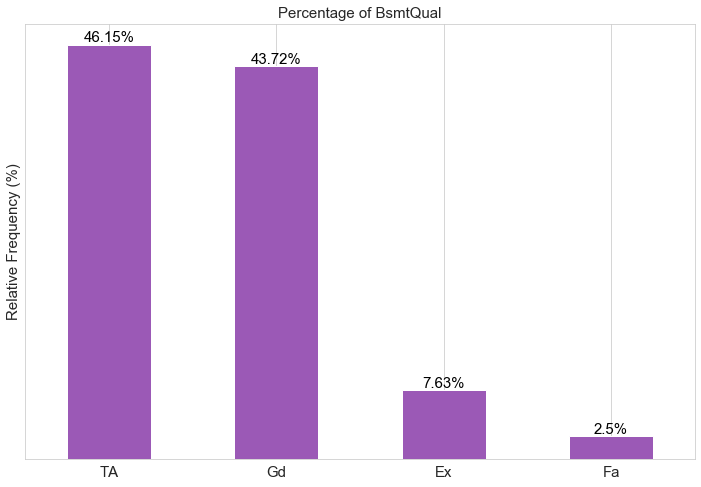

In [54]:
freq_table(train.BsmtQual)

Would an "excellent" type have a higher sales price? Would it also be correlated to the size as well?

catplot or factorplot are figure level functions. This means that they are supposed to work on the level of a figure and not on the level of axes.

Text(0.5, 0.98, 'BsmtQual vs. SalePrice')

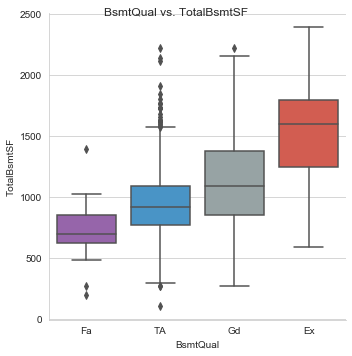

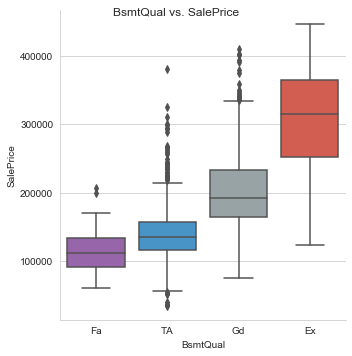

In [55]:
# Set figure size
# fig, ax = plt.subplots(figsize=(16,10), ncols=2)

# Create plots: 1 for bsmtqual/totalbsmtsf & 1 for bsmtqual/saleprice
ax1 = sns.catplot(x='BsmtQual',
                  y='TotalBsmtSF',
                  data=train[train.TotalBsmtSF<6000],
                  kind='box',
                  order=['Fa', 'TA', 'Gd', 'Ex']
                  )

ax2 = sns.catplot(x='BsmtQual',
                  y='SalePrice',
                  data=train,
                  kind='box',
                  order=['Fa', 'TA', 'Gd', 'Ex']
                  )

# Set plot features
ax1.fig.suptitle('BsmtQual vs. TotalBsmtSF', fontsize=12)
# ax1.subplots_adjust(top=0.80) # for facet only
ax2.fig.suptitle('BsmtQual vs. SalePrice', fontsize=12)

Variables look fairly correlated. Let's move on to the next step.

### FirePlace Quality vs. Sale Price

I've done some plotting before in R with some of these features so I am replicating them in Python. Would you assume that a better quality fire place would mean higher sale price? Let's see the distribution.

Text(0, 0.5, 'Sale Price')

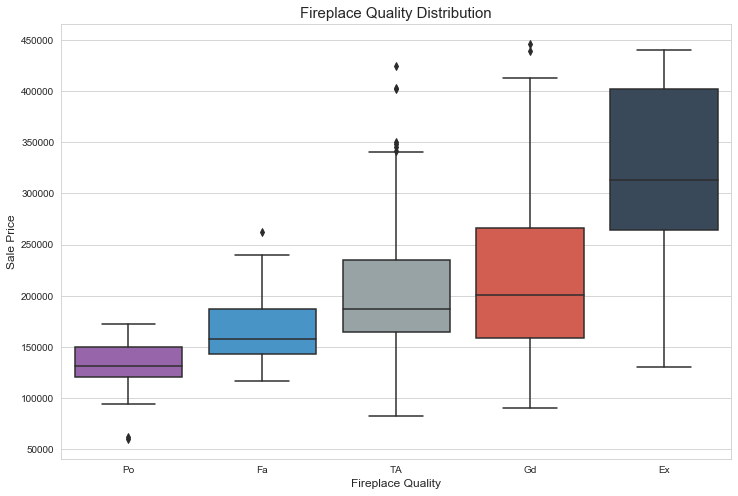

In [56]:
# Create the figure space
fig, ax = plt.subplots(figsize=(12, 8))

# Create boxplots
ax = sns.boxplot(x='FireplaceQu',
                 y='SalePrice',
                 data=train,
                 order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])

# Set plot features
ax.set_title('Fireplace Quality Distribution', fontsize=15)
ax.set_xlabel('Fireplace Quality', fontsize=12)
ax.set_ylabel('Sale Price', fontsize=12)

Frequency of FireplaceQu :


,Count,Percentage
Gd,364,48.60
TA,309,41.26
Fa,33,4.41
Ex,23,3.07
Po,20,2.67


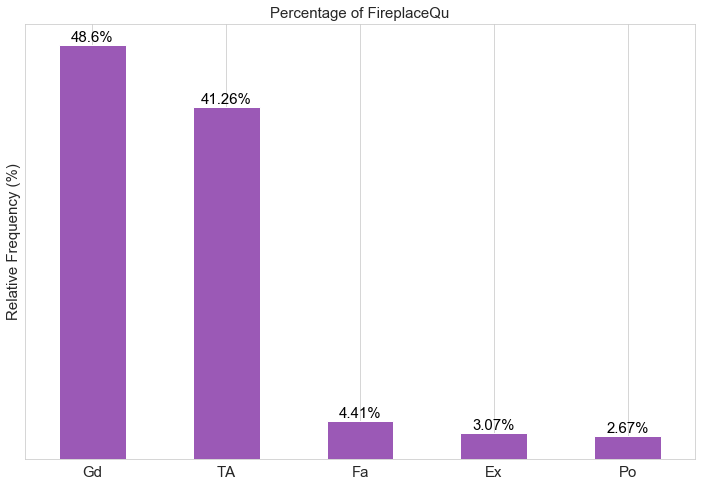

In [57]:
freq_table(train.FireplaceQu)

### MSZoning vs Sale Price

This feature requires a little research in understanding what exactly do each term means. I found something that may be useful in deciphering what it is. It's codes are for apparently certain zones of property development. 

Here's an excerpt I found that was under "Property Development Standards": 

    "The following schedule prescribes development standards for residential zoning districts and subdistricts designated on the zoning map."

Codes:

    A       = Agriculture
    C (all) = Commercial
    FV      = Floating Village Residential
    I       = Industrial
    RH      = Residential High Density
    RL      = Residential Low Density
    RP      = Residential Low Density Park
    RM      = Residential Medium Density

Text(0, 0.5, 'Sale Price')

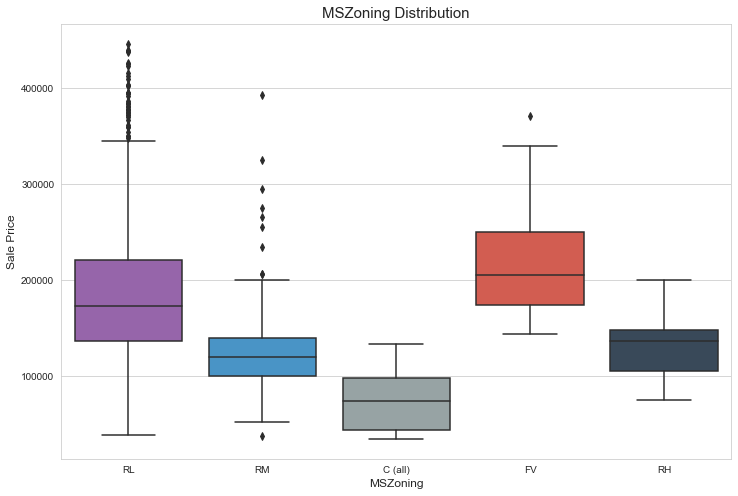

In [58]:
# Create the figure space
fig, ax = plt.subplots(figsize=(12, 8))

# Create boxplots
ax = sns.boxplot(x='MSZoning',
                 y='SalePrice',
                 data=train)
#                  order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])

# Set plot features
ax.set_title('MSZoning Distribution', fontsize=15)
ax.set_xlabel('MSZoning', fontsize=12)
ax.set_ylabel('Sale Price', fontsize=12)

### Lot Area vs. Sale Price

Text(0, 0.5, 'Sale Price')

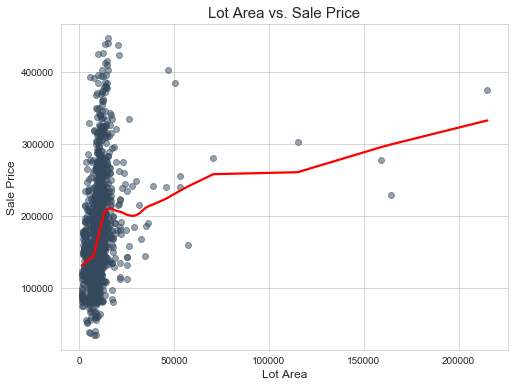

In [59]:
# Set figure space
plt.figure(figsize=(8, 6))

# Create scatterplot with loess line
sns.regplot(x='LotArea',
            y='SalePrice',
            data=train,
            lowess=True,
            scatter=True,
            color='#34495e',
            line_kws={'color': 'red'},
            scatter_kws={'alpha': 0.50})

# Set plot features
plt.title('Lot Area vs. Sale Price', fontsize=15)
plt.xlabel('Lot Area', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)


As you can see, I am definitely going to drop some of these just because they are extreme points that are way different than the distribution. Would I do this on a real dataset I am working on for production? That's a maybe, I would attempt to see how the model would perform with the outlier, create the model with some robust scaler, or see initial performance on both methods then model again without.

In [60]:
# Drop outliers
train = train.drop(train[(train.LotArea>30000)].index)

Text(0, 0.5, 'Sale Price')

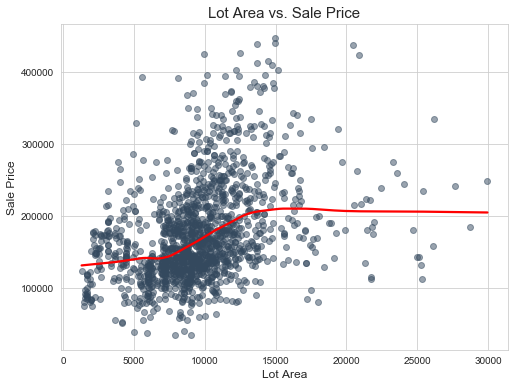

In [61]:
# Set figure space
plt.figure(figsize=(8, 6))

# Create scatterplot with loess line
sns.regplot(x='LotArea',
            y='SalePrice',
            data=train,
            lowess=True,
            scatter=True,
            color='#34495e',
            line_kws={'color': 'red'},
            scatter_kws={'alpha': 0.50})

# Set plot features
plt.title('Lot Area vs. Sale Price', fontsize=15)
plt.xlabel('Lot Area', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)

Definitely looks a lot better but there are still some outliers. We will leave them for now as there are always homes that may be bigger than others.

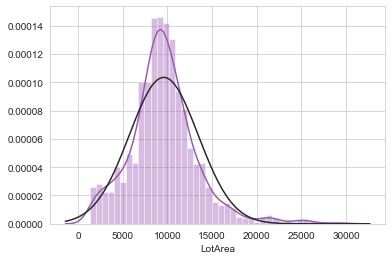

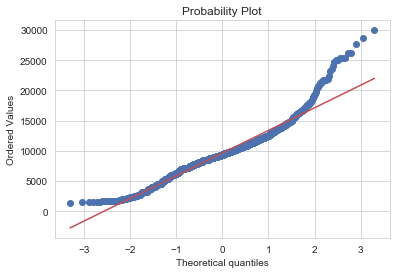

In [62]:
# Looks more normal removing the additional points
hist_qq_plot(train[train.LotArea<30000].LotArea)

In [63]:
# See if I really want to remove them
train[train.LotArea>25000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
197,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000,12.367345
588,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,Inside,...,NaN,NaN,NaN,0,6,2009,WD,Partial,143000,11.870607
692,60,RL,42.0,26178,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2006,WD,Normal,335000,12.721889
828,60,RL,NaN,28698,Pave,NaN,IR2,Low,AllPub,CulDSac,...,NaN,NaN,NaN,0,6,2009,WD,Abnorml,185000,12.128117
876,20,RL,94.0,25286,Pave,NaN,Reg,HLS,AllPub,Inside,...,NaN,NaN,NaN,0,1,2007,WD,Normal,132250,11.792457
934,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,...,NaN,NaN,NaN,0,11,2008,WD,Normal,242000,12.396697
1057,60,RL,NaN,29959,Pave,NaN,IR2,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,1,2009,WD,Normal,248000,12.421188
1383,30,RL,NaN,25339,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,112000,11.626263
1446,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,NaN,NaN,NaN,0,4,2010,WD,Normal,157900,11.969724


Probably won't, I've already dropped anything over 30,000 in lot area. I need as much data as I can at this point, if the feature is bad in feature importance then I might reconsider.

### Create a new feature called YrRemodel_Diff

In [64]:
train['YrRemodel_Diff'] = train['YearRemodAdd'] - train['YearBuilt']
test['YrRemodel_Diff'] = test['YearRemodAdd'] - test['YearBuilt']

### Plot YrRemodel_Diff vs. Sale Price

[[]]

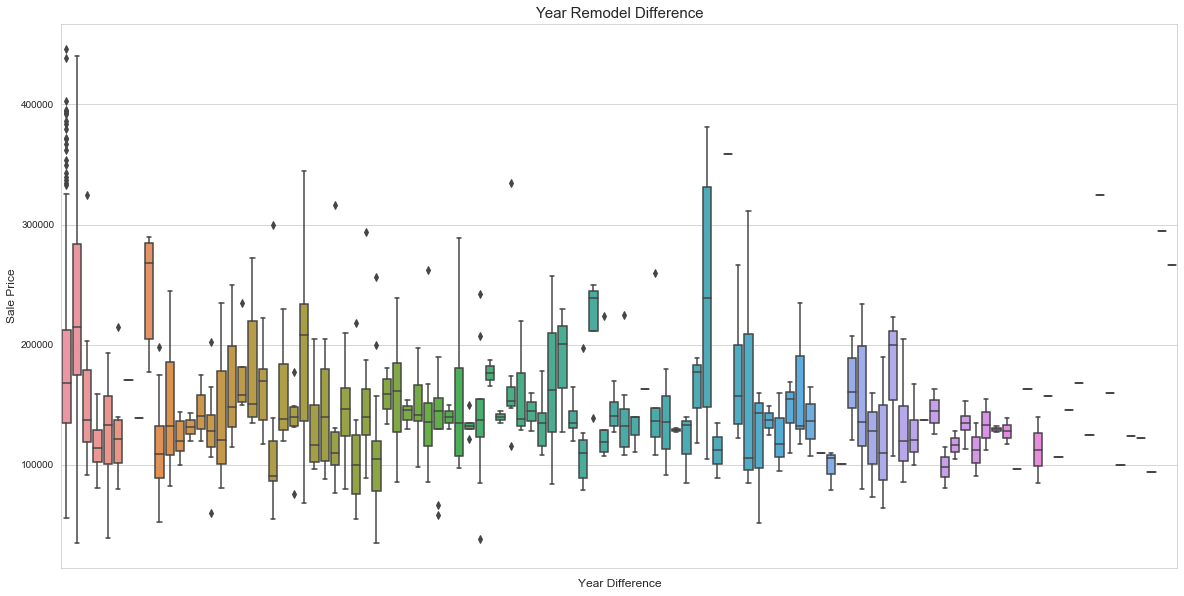

In [65]:
# Create figure space
fig, ax = plt.subplots(figsize=(20,10))

# Create boxplot
ax = sns.boxplot(x='YrRemodel_Diff',
                 y='SalePrice',
                 data=train)

# Set plot features
plt.xticks(rotation='45')
ax.set_title('Year Remodel Difference', fontsize=15)
ax.set_xlabel('Year Difference', fontsize=12)
ax.set_ylabel('Sale Price', fontsize=12)
ax.set(xticklabels=[])

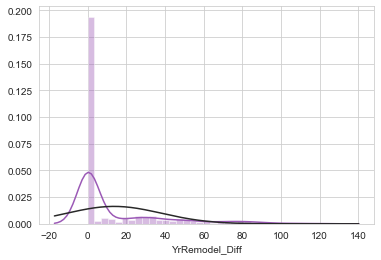

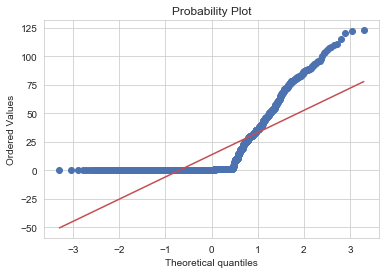

In [66]:
hist_qq_plot(train.YrRemodel_Diff)

Well this feature's distribution is not good at all but we do see that there is a large amount of remodels set at 0 which means there were none.

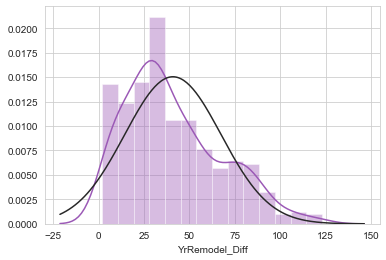

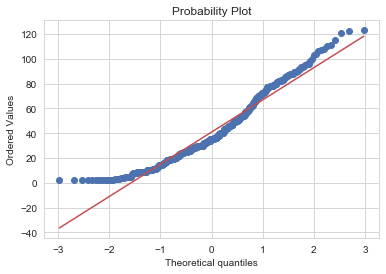

In [67]:
# Let's plot with the zeros
hist_qq_plot(train[train.YrRemodel_Diff>1].YrRemodel_Diff)

Distribution with the zeroes show a right skew distribution of the data. This means that there are more remodels that are newer, which makes sense. Let's bin the remodel years actually. I would want to see how it the distribution looks like.

In [68]:
# Define function
def create_remodel_diff_bin(var):
    grp=''
    if var==0:
        grp='Never Remodeled'
    elif var>=1 and var <11:
        grp='1-10'
    elif var>=11 and var <21:
        grp='11-20'
    elif var>=21 and var <31:
        grp='21-30'
    elif var>=31 and var <41:
        grp='31-40'
    elif var>=41 and var <51:
        grp='41-50'
    elif var>=51 and var <61:
        grp='51-60'
    elif var>=61 and var <71:
        grp='61-70'
    else:
        grp='71+'
    return grp

### Create a new remodel diff group feature then drop it if it does not look useful

In [69]:
train['Yr_Remodel_Group'] = train.YrRemodel_Diff.map(create_remodel_diff_bin)
test['Yr_Remodel_Group'] = test.YrRemodel_Diff.map(create_remodel_diff_bin)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice,YrRemodel_Diff,Yr_Remodel_Group
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500,12.247699,0,Never Remodeled
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500,12.109016,0,Never Remodeled
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500,12.317171,1,1-10
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2006,WD,Abnorml,140000,11.849405,55,51-60
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,2008,WD,Normal,250000,12.429220,0,Never Remodeled


### Plot the new remodel feature

Text(0, 0.5, 'Sale Price')

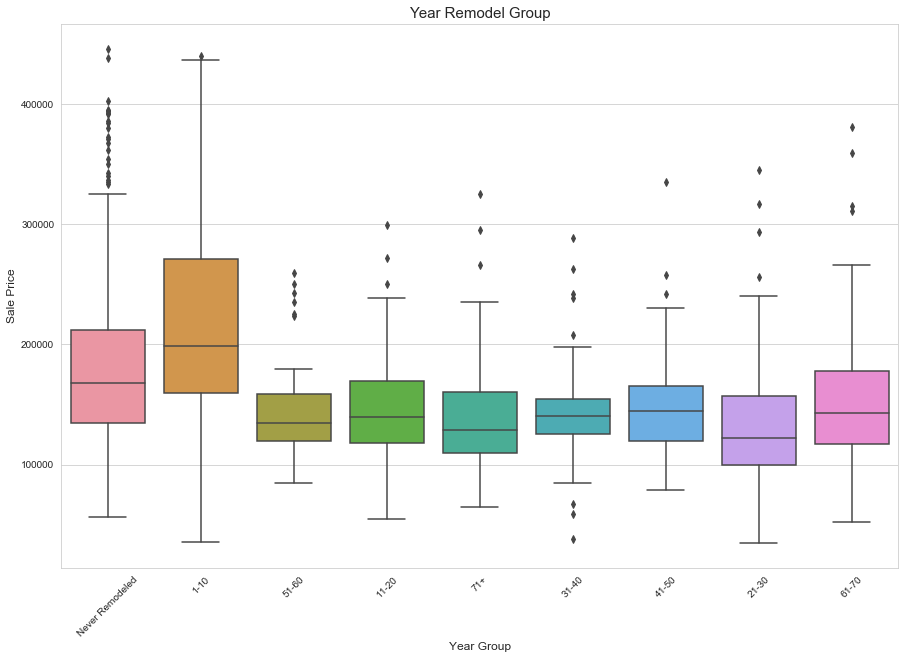

In [70]:
# Create figure space
fig, ax = plt.subplots(figsize=(15,10))

# Create boxplot
ax = sns.boxplot(x='Yr_Remodel_Group',
                 y='SalePrice',
                 data=train)

# Set plot features
plt.xticks(rotation='45')
ax.set_title('Year Remodel Group', fontsize=15)
ax.set_xlabel('Year Group', fontsize=12)
ax.set_ylabel('Sale Price', fontsize=12)

This is a lot easier to visualize and digest. Homes remodeled with the last 10 years have a higher sale price. Maybe homes are more decked out in modern style remodels than the past which could be a reason in the price hike. I think this feature may be better than the actual quantitative feature. We may lose some informtion but it's worth a shot.

Text(0, 0.5, 'Sale Price')

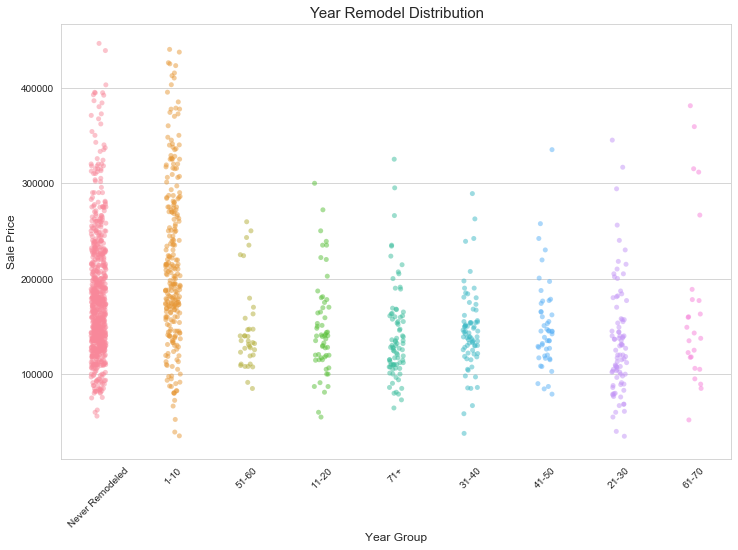

In [71]:
# Create figure space
fig, ax = plt.subplots(figsize=(12,8))

# Create jitter
ax = sns.stripplot(x='Yr_Remodel_Group',
                   y='SalePrice',
                   data=train,
                   jitter=True,
                   alpha=0.50)

# Set plot features
plt.xticks(rotation='45')
ax.set_title('Year Remodel Distribution', fontsize=15)
ax.set_xlabel('Year Group', fontsize=12)
ax.set_ylabel('Sale Price', fontsize=12)

### Drop YrRemodel_Diff

We will use the group feature instead.

In [72]:
train.drop(['YrRemodel_Diff'], axis=1, inplace=True)
test.drop(['YrRemodel_Diff'], axis=1, inplace=True)

### Sale Type vs Sale Price Jitter & BoxPlot

Text(0.5, 1.0, 'Sale Type Distribution by Points')

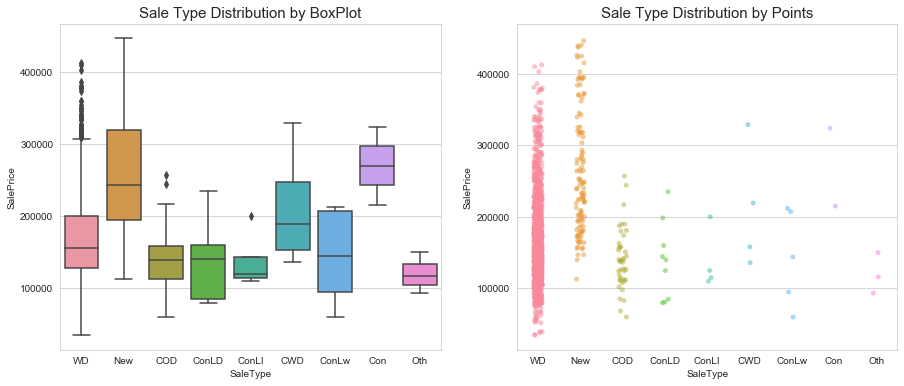

In [73]:
# # Create facet grid
# ax = sns.FacetGrid(train,
#                    col='SaleType',
#                    row='Yr_Remodel_Group',
#                    margin_titles=True,
#                    hue='SaleType')

# # Create plot using map()
# ax = ax.map(plt.hist, 'SalePrice', edgecolor='w')

# Create figure space
fig, ax = plt.subplots(figsize=(15,6), ncols=2, nrows=1)

# Create plot
ax1 = sns.boxplot(x='SaleType',
                 y='SalePrice',
                 data=train,
                 ax=ax[0])

ax2 = sns.stripplot(x='SaleType',
                   y='SalePrice',
                   data=train,
                   jitter=True,
                   alpha=0.50,
                   edgecolor='w',
                   ax=ax[1])

# Set plot features
ax1.set_title('Sale Type Distribution by BoxPlot', fontsize=15)
ax2.set_title('Sale Type Distribution by Points', fontsize=15)

Without the jitter plot, we wouldn't know just by plotting a boxplot that the distribution count from ConLD all the way to the right values do not have a large type count. We can try to group them together if they are similar or group them into the larger samples.

### Lot Frontage vs Sale Price

Linear feet of street connected to property

[[]]

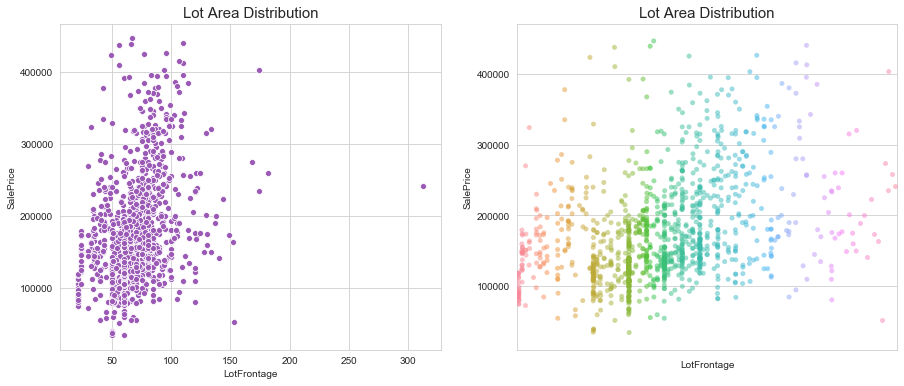

In [74]:
# Create figure space
fig, ax = plt.subplots(figsize=(15,6), ncols=2, nrows=1)

# Create plot
ax1 = sns.scatterplot(x='LotFrontage',
                      y='SalePrice',
                      data=train,
                      ax=ax[0])

ax2 = sns.stripplot(x='LotFrontage',
                   y='SalePrice',
                   data=train,
                   jitter=True,
                   alpha=0.50,
                   edgecolor='w',
                   ax=ax[1])

# Set plot features
ax1.set_title('Lot Area Distribution', fontsize=15)
ax2.set_title('Lot Area Distribution', fontsize=15)
ax2.set(xticklabels=[])

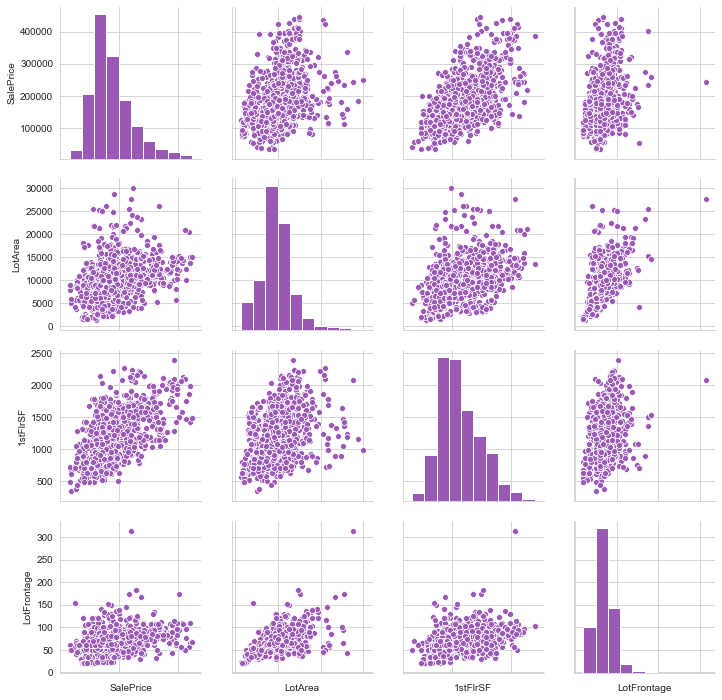

In [75]:
# Features that pertains to area
ax = sns.pairplot(train[['SalePrice', 'LotArea', '1stFlrSF', 'LotFrontage']])
ax.set(xticklabels=[])
plt.show()

Would have thought that the areas would have a stronger linear relationship between them but it does not look that obvious based on these scatters.

### Create a house age feature

In [76]:
train['HouseAge'] = train.YrSold.max() - train.YearBuilt
test['HouseAge'] = test.YrSold.max() - test.YearBuilt

### House Age Plot

<Figure size 1440x1080 with 0 Axes>

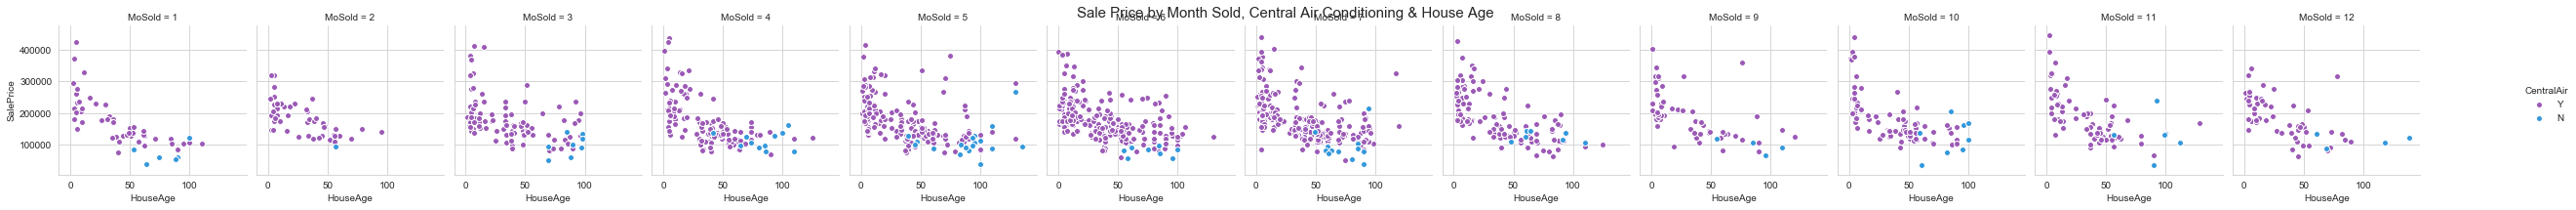

In [77]:
# Set colors
# colors = {1: 'lightblue', 0: 'gray'}

# Create a figure
plt.figure(figsize=(20,15))

# Create facet grid
ax = sns.FacetGrid(train,
                   col='MoSold',
                   hue='CentralAir',
                   margin_titles=True)
#                    palette=colors)

# Create scatter
ax.map(plt.scatter, 'HouseAge', 'SalePrice', edgecolor='w') # , s=100)

# Add a legend
ax.add_legend()

# Set plot features
ax.fig.suptitle('Sale Price by Month Sold, Central Air Conditioning & House Age', size=15)
# plt.subplots_adjust(top=0.85)
plt.show()

Not sure how to make the facet grid larger.... but from this tiny chart there are more houses with air conditioning sold during the summer months and we can see that the air conditioning homes (purple points) have a higher spread and sale price than the ones without. This is definitely a useful determinant.

### What's next?

We've taken a look at some features that may have a good predictive ability for SalePrice, but it's going to be a bit too time consuming plotting every single chart and dissecting every bivariate analysis per 2 features. So, let's take a use the correlation plot.

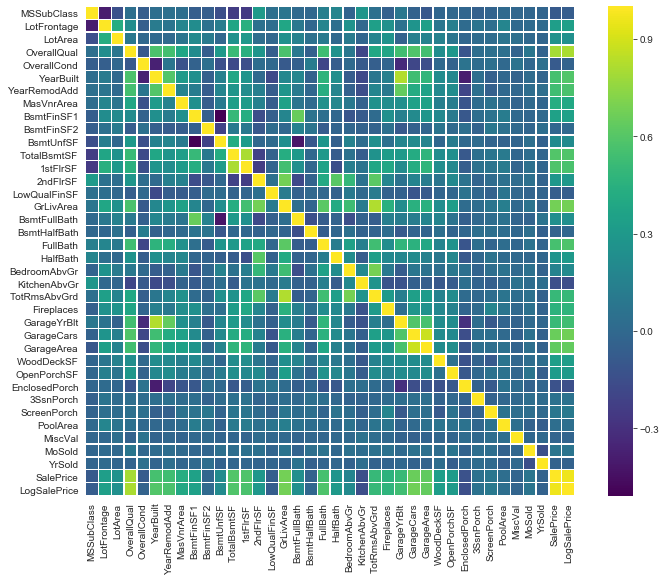

In [78]:
# Calling corr_plot wasn't showing the plot so copy and pasting it again

# Create a figure space
plt.subplots(figsize=(12,9))

# Create matrix
corr_plot = sns.heatmap(num_data.corr(),
#                         annot=True,
                          cmap='viridis', # YlGnBu, RdBu_r
                          linewidths=0.20,
                          linecolor='white',
                          vmax=1,
                          square=True,
                          fmt='.1g',
                          annot_kws={"size": 12})
corr_plot

There are a few yellow or dark blue squares that indicate high correlation (positive or negative). We can actually use the nlargest method to get the top correlated features by setting the k value.

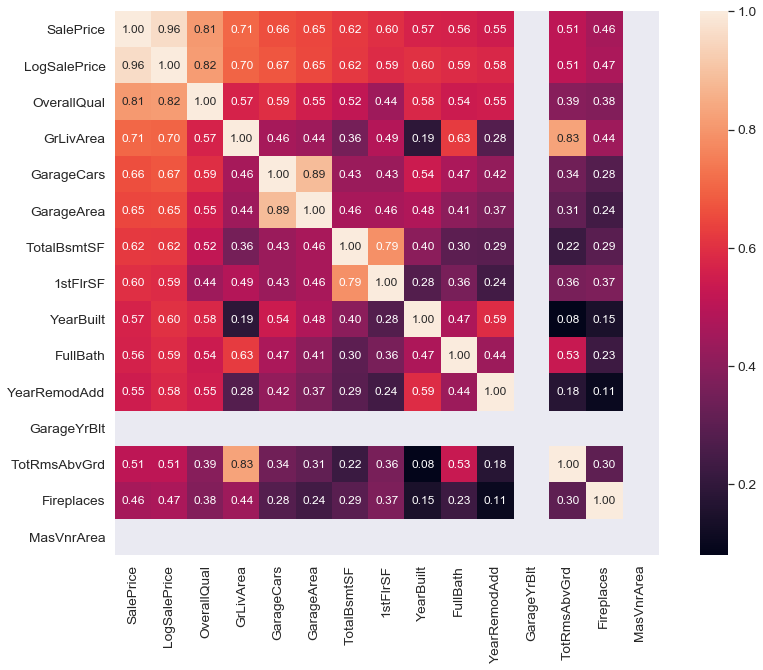

In [79]:
# Set figure space
plt.figure(figsize=(15,10))

# Set k (number of variables for the heatmap)
k = 15

# Create correlation using corr.nlargest()
top_corr = num_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index

# Get correlation coefficient
cm = np.corrcoef(train[top_corr].values.T)

# Set plot scale
sns.set(font_scale=1.25)

# Create heatmap
top_corr_plot = sns.heatmap(cm, cbar=True, annot=True, square=True,
                            fmt='.2f', annot_kws={'size': 12}, yticklabels=top_corr.values,
                            xticklabels=top_corr.values)
plt.show()

I believe the great areas represent null values. Correlation plots don't work well if the data is complete so we need to complete the dataset before being able to view the full matrix. There are a few 0.80 numbers and up which means that the variables are highly correlated. We can attempt to not use them in the final models depending on what we are trying to achieve here.

Top 3: OverallQual, GrLivArea, GarageCars

Next 3: GarageArea, TotalBsmtSF, 1stFlrSF

We haven't plotted GarageCars but I would think it would be correlated by the garage area. A surprising one was the FullBath variable. But if you think about it, who woudn't want a full bath in their home. A full bath could mean a better lifestyle for convenience sake. YearBuilt and YearRemodAdd is pretty close too.

We can create a YrRemodel_Diff which is the difference between YearRemodAdd & YearBuilt. Newer homes do tend to make more money.

### Create a new feature called TotalSF

In [80]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

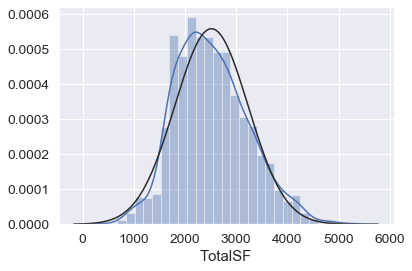

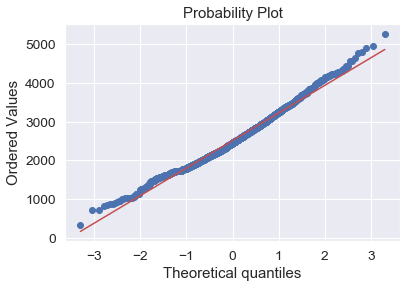

In [81]:
# Plot 
hist_qq_plot((train['TotalSF']))

In [82]:
# Check the outliers to make sure it was dropped already
train[train.TotalSF>6000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice,Yr_Remodel_Group,HouseAge,TotalSF


Let's drop them if not, since should not be not too many. Even if the dataset is kind of small the goal right now is to predict sale price. We can do a safer approach without dropping if anything for practice.

### Pandas Profiling....

This is very handy. In a single line of code, it displays the data profiling report. Some of the information is pretty detailed. Check it out below. Beware, it does get pretty long.

In [ ]:
pandas_profiling.ProfileReport(train)

# # Output to a html file if needed
# profile = pandas_profiling.ProfileReport(train)
# profile.to_file(outputfile='House regression data profiling.html')

### Let's fix some of the NA features

I would normally combine the train and test datasets, but to follow the modeling process, I will leave the test set out of this and just repeat any additional transformations after (not including the newly created features).

In [83]:
# Find numeric features
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = train.select_dtypes(include=num_dtypes)

# Find all other features
col_data = train.select_dtypes(include=['object'])

In [84]:
# Copy data to make sure we don't mess up and if we do just rerun
model_train = train.copy()

# Replace categorical features with none
fill_col_columns = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition', 'Yr_Remodel_Group']

# Replace categorical features with mode
fill_mode_columns = ['SaleType', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Electrical', 'MSZoning']

# None values
for i in fill_col_columns:
    model_train[i] = model_train[i].fillna('None')

# Mode values
for i in fill_mode_columns:
    model_train[i] = model_train[i].fillna(model_train[i].mode())

# Specific values
model_train['Functional'] = model_train['Functional'].fillna('Typ')
model_train['Electrical'] = model_train['Electrical'].fillna('SBrkr')

In [85]:
fill_num_columns = ['MSSubClass','LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'LogSalePrice', 'TotalSF', 'HouseAge']

# Zero values
for i in fill_num_columns:
    model_train[i] = model_train[i].fillna(0)
    
# Specific values
'''
Look up differences between these three
transform() is an operation used in conjunction with groupby (which is one of the most useful operations in pandas)
vs. map()
vs apply()
'''
model_train['LotFrontage'] = model_train.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [86]:
model_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice,Yr_Remodel_Group,HouseAge,TotalSF
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,208500,12.247699,Never Remodeled,7,2566
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,181500,12.109016,Never Remodeled,34,2524
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,223500,12.317171,1-10,9,2706
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,140000,11.849405,51-60,95,2473
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,250000,12.429220,Never Remodeled,10,3343


In [87]:
# Check for nulls
# model_train.isnull().sum().sort_values(ascending=False)

### Feature Engineering

So far we have collected some information on some features from living area to certain house attributes. With some familiarity of houses and the exploration of the data, we could create additional features that may positively affect the model prediction. This is where creativity can kick in even more and as the saying goes "garbage in means garbage out" so we obviously want the best features we can get.

Some information we have so far:
- The newer the home usually equates to a higher price
- Sqft is a large factor
- Chances are that homes are more likely to be sold from spring to summer
- Quality of the home is good for the sale price
- An excellent fireplace quality has a higher mean price
    - This could also indicate that the house has nice qualities overall with other attributes that we may not have looked at
    - Imagine going into a home and it's new with a nice fireplace in a large living room space

In [88]:
# train['NewHouse'] = [1 if train['YearBuilt'] == train['YrSold'] else 0]

# NewHouse = []
# for i in train:
#     if train.loc[i, 'YearBuilt'] == train.loc[i, 'YrSold']:
#         NewHouse.append('1')
#     else:
#         NewHouse.append('0')

# # Define a function to get NewHouse
# def new_house(df):
#     text=''
#     if df == train['YrSold']:
#         text='Yes'
#     else:
#         text='No'
#     return text

# train['NewHouse'] = train.YearBuilt.map(new_house)

In [89]:
# Create new features based on conditions
model_train['NewHouse'] = np.where(model_train['YearBuilt']==model_train['YrSold'], 1, 0)
model_train['TotalLotArea'] = model_train.LotFrontage + model_train.LotArea
model_train['OverallQualityCondition'] = model_train.OverallCond + model_train.OverallQual

# Basically flags if a house has a certain feature
model_train['HasWoodDeck'] = (model_train['WoodDeckSF'] == 0) * 1 # found this from another kernel, interesting way to write method
model_train['HasOpenPorch'] = (model_train['OpenPorchSF'] == 0) * 1
model_train['HasEnclosedPorch'] = (model_train['EnclosedPorch'] == 0) * 1
model_train['Has3SsnPorch'] = (model_train['3SsnPorch'] == 0) * 1
model_train['HasScreenPorch'] = (model_train['ScreenPorch'] == 0) * 1
model_train['HasPool'] = model_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
model_train['Has2ndfloor'] = model_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
model_train['HasGarage'] = model_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
model_train['HasBsmt'] = model_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
model_train['HasFireplace'] = model_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Total Bathrooms - a big feature, definitely something I would look at 
model_train['TotalBathrooms'] = (model_train['FullBath'] + (0.5*model_train['HalfBath']) +
                                 model_train['BsmtFullBath'] + (0.5*model_train['BsmtHalfBath']))

##########################################################
# Create new features based on conditions
test['NewHouse'] = np.where(test['YearBuilt']==test['YrSold'], 1, 0)
test['TotalLotArea'] = test.LotFrontage + test.LotArea
test['OverallQualityCondition'] = test.OverallCond + test.OverallQual

# Basically flags if a house has a certain feature
test['HasWoodDeck'] = (test['WoodDeckSF'] == 0) * 1
test['HasOpenPorch'] = (test['OpenPorchSF'] == 0) * 1
test['HasEnclosedPorch'] = (test['EnclosedPorch'] == 0) * 1
test['Has3SsnPorch'] = (test['3SsnPorch'] == 0) * 1
test['HasScreenPorch'] = (test['ScreenPorch'] == 0) * 1
test['HasPool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['Has2ndfloor'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test['HasGarage'] = test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test['HasBsmt'] = test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test['HasFireplace'] = test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Total Bathrooms - a big feature, definitely something I would look at 
test['TotalBathrooms'] = (test['FullBath'] + (0.5*test['HalfBath']) +
                          test['BsmtFullBath'] + (0.5*test['BsmtHalfBath']))


In [90]:
# Check new feature to see if this makes sense
model_train.groupby('NewHouse').SalePrice.mean()

NewHouse
0    172012.028655
1    264026.114754
Name: SalePrice, dtype: float64

### Check Skew

In [91]:
## Shorter version
# numeric_features = model_train.dtypes[model_train.dtypes != "object"].index
# Check the skew of all numerical features
# skew_features = model_train[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skews = pd.DataFrame({'Skew' :skew_features})
# skews.head()

# For loop version
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_list = []
for i in model_train.columns:
    if model_train[i].dtype in numeric_dtypes: 
        numeric_list.append(i)

# Dataframe has no attribute map() so we have to use the apply() fuction
skew_features = model_train[numeric_list].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'Skew':skew_features})
skews.head(10)

,Skew
MiscVal,24.198851
PoolArea,17.296949
HasPool,16.775087
3SsnPorch,10.155258
LowQualFinSF,9.068929
NewHouse,4.511795
KitchenAbvGr,4.456359
BsmtFinSF2,4.333061
ScreenPorch,4.179170
BsmtHalfBath,4.133400


### Which transformation should we use on the features?

My go-to transformation is normally a boxcox transformation, but it does not handle zero values. There is another transformation that's [boxcox1p](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.boxcox1p.html). All it really does is add a 1 to the value so no values would be zero, which is what we did earlier to do a log transformtion for SalePrice.

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. This helps with any outliers and helps us meet the normality assumption for many statistical techniques. Remember that the test only works for positive data

In [92]:
from scipy.special import boxcox1p # Compute the Box-Cox transformation of 1 + x
from scipy.stats import boxcox_normmax # Compute optimal Box-Cox transform parameter for input data

# Get high skews
high_skew = skew_features[skew_features>0.50] # mid
skew_index = high_skew.index 
print('There are {} skewed features.'.format(high_skew.shape[0]))

# Loop through the index and transform
for i in skew_index:
    model_train[i] = boxcox1p(model_train[i], boxcox_normmax(model_train[i]+1))

# Get new transformed features
new_skew_features = model_train[numeric_list].apply(lambda x: skew(x)).sort_values(ascending=False)
new_skews_df = pd.DataFrame({'Skew': new_skew_features})
new_skews_df.head(15)

There are 30 skewed features.


,Skew
PoolArea,16.896940
HasPool,16.775087
3SsnPorch,7.639642
LowQualFinSF,7.441341
MiscVal,5.235582
NewHouse,4.511795
BsmtHalfBath,3.951327
KitchenAbvGr,3.922276
ScreenPorch,3.379757
BsmtFinSF2,2.683391


In [93]:
# Check corr
pd.DataFrame(abs(train.corr()['SalePrice']).sort_values(ascending=False))

,SalePrice
SalePrice,1.000000
LogSalePrice,0.963413
TotalSF,0.814526
OverallQual,0.808362
GrLivArea,0.705429
GarageCars,0.658925
GarageArea,0.645713
TotalBsmtSF,0.621782
1stFlrSF,0.599627
HouseAge,0.568003


## Modeling

So now we have some visual analyses done, feature engineered some new data, and cleaned up the data, we will move onto the modeling stage. This includes making sure we have our train and test dataset split up all the way to comparing tuned models. Some steps are listed below:

Modeling & Scoring
    - Dropping any features we will not be using in training
    - Standardizing data
    - Splitting the data into train/test
    - What models are appropriate?
        - Regression
    - Pre-Tuning
    - Cross-Validating
    - Hyperarameter Tuning
    - Tuned Models Using Best Hyperparameters
    - Comparison: Pre-Tuning vs. CV vs. Tuned Model vs. CV Tuned

In [94]:
model_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Dropping columns

We created a few features off of the current train data so there is certainly multicollinearity so we can remove some features first before we split our data. But first, as curiosity hits, let's leave it initially and I assume it will have a better score on the training data.

In [95]:
# Drop any feature that we have not yet
model_train.drop(['SalePrice', 'YearRemodAdd'], axis=1, inplace=True)
test.drop(['YearRemodAdd'], axis=1, inplace=True)

In [96]:
# Get data shape, info, columns, & dimensions
print ("*"*40)
print('********** train shape: ' + str(model_train.shape) + '*'*10)
print ("*"*40)
print('********** test shape: ' + str(test.shape) + '*'*10)

****************************************
********** train shape: (1422, 96)**********
****************************************
********** test shape: (1459, 95)**********


### Updating feature types

There are some features like MoSold and YrSold that I believe should be categorical so we should update the type on that.

In [97]:
# Convert to str
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

# Wonder if I should update this here as well - i'll leave it for now
test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

### Dummy Variables

Dummy variables is an important pre-processing step. It's usually used when important features are not numerical so we have to transform them into binary values 0 or 1. Many models would prefer or need numerical features to be used in order for it to work properly. While working with a dataset, we want to make sure the computer is able to understand the differences. Computer processing power is also a lot better with straight numbers, vectors, or anything numer related vs strings/text/categorical.

To transform variables in Python, we must use pandas.get_dummies() function. In R, it's similar to model_matrix(~y). This will produce sparse columns which will grow horizontally and can get exponentially more difficult as we have to search through more dimensions.

In [98]:
# Create a list of features for specific dummy variables
dummy_list = []
model_train = pd.get_dummies(model_train).reset_index(drop=True) 
                           # drop_first=False
                            # Whether to get k-1 dummies out of k categorical levels by removing the first level
    
# Other parameters if there is a certain list: columns=dummy_list

In [99]:
model_train_dupe = model_train.copy()
model_train.shape

(1422, 325)

In [100]:
# Remove any duplicated column names
model_train = model_train.loc[:, ~model_train.columns.duplicated()]

### Normalizing the test with train
I did not combine my train and test data to mimic real world applications, so I would need to make sure all of my features that are in my train set are also in my test set including and transformations I did. In R, depending on how the data was extracted to cleaning, normalized the numerical train features and saved them then applied them to the test set. So far the kernels I have seen so far combined the data set, which is not what I'm aiming for. So more researching here I come.

In [101]:
# Save the actual test set to another variable
test_dupe = test.copy()

In [102]:
# Split the model data to train and test
train = model_train
print('Train data shape: ' + str(train.shape))


# train = model_train[1:891]
# test = model_train[892:model_train.shape[0]]
# print('Test data shape: ' + str(test.shape))

Train data shape: (1422, 325)


### Split the variables between X and y

In [103]:
# Split
y = train['LogSalePrice']
X = train.drop(['LogSalePrice'], axis=1)

Split the training data for cross-validation

Split the train data into 4 parts, train_x, test_x, train_y, test_y

    train_x and train_y first used to train the algorithm.
    then, test_x is used in that trained algorithms to predict outcomes.
    Once we get the outcomes, we compare it with test_x


In [104]:
# Import split module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Check
X_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleCondition_Partial,Yr_Remodel_Group_1-10,Yr_Remodel_Group_11-20,Yr_Remodel_Group_21-30,Yr_Remodel_Group_31-40,Yr_Remodel_Group_41-50,Yr_Remodel_Group_51-60,Yr_Remodel_Group_61-70,Yr_Remodel_Group_71+,Yr_Remodel_Group_Never Remodeled
904,4.205163,15.033760,363.240999,8,3.093981,2007,0.000000,10.318964,0.000000,122.129461,...,0,0,0,0,0,0,0,0,0,1
1143,6.001744,21.293339,551.129083,5,3.535447,1946,0.000000,62.531843,10.924324,96.444131,...,0,0,0,0,0,1,0,0,0,0
353,7.220444,13.971525,322.421414,7,3.093981,2003,31.233264,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [162]:
X_test.shape

(356, 324)

In [163]:
y_test.shape

(356,)

### What is make_pipeline()?

Stack Answer - 

Pipeline is a combination of several functions into one, which makes cleaner code and less steps to take. So similar to how you make transform your train set and fit to predict, pipeline performs the entire sequence from different transformations (finding set of features, generating new features, and feature selection) of the data before applying the final estimator.

Pipeline gives you a single interface for all 3 steps of transformation and resulting estimator and also encapsulates transformers and predictors inside.

With pipelines you can easily perform a grid-search over a set of params for each step of the meta-estimator.

Old:

    vect = CountVectorizer()
    tfidf = TfidfTransformer()
    clf = SGDClassifier()

    vX = vect.fit_transform(Xtrain)
    tfidfX = tfidf.fit_transform(vX)
    predicted = clf.fit_predict(tfidfX)

    # Now evaluate all steps on test set
    vX = vect.fit_transform(Xtest)
    tfidfX = tfidf.fit_transform(vX)
    predicted = clf.fit_predict(tfidfX)
    
New:

    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SGDClassifier()),
    ])
    
    predicted = pipeline.fit(Xtrain).predict(Xtrain)
    predicted = pipeline.predict(Xtest)

### Models

Our goal is to make some sort of stacking and blending model so we have to first instantiate the base models.

In [123]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import ExtraTreesRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR # SVC = classification

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, plot_importance 

In [115]:
# Set seed
seed = 150

# Instantiate baseline model
lm = LinearRegression()

# Instantiate additional base models
rf = RandomForestRegressor(random_state=seed)
gbr = GradientBoostingRegressor(random_state=seed)
# abr =AdaBoostRegressor(random_state=seed)
# br = BaggingRegressor(random_state=seed)
# etr = ExtraTreesRegressor(random_state=seed)
lasso_cv = LassoCV()
ridge_cv = RidgeCV()
glmnet_cv = ElasticNetCV(random_state=seed)
svr = SVR()
lgbmr = LGBMRegressor(random_state=seed)
xgbr = XGBRegressor(random_state=seed)

### Cross-Validation Method

We want to make sure that we the model is not a one time fluke so we validate it through several iterations. I usually use a KFold method which splits the training data into 9 parts training and 1 part validation if the K is 10.

Some types of cv methods: KFold, StratifiedShuffleSplit, StratifiedKFold or ShuffleSplit

In KFolds, each test set should not overlap, even with shuffle. With KFolds and shuffle, the data is shuffled once at the start, and then divided into the number of desired splits. The test data is always one of the splits, the train data is the rest.

In ShuffleSplit, the data is shuffled every time, and then split. This means the test sets may overlap between the splits.

Check the sklearn guide for more info.

In [107]:
# Set CV method
cv = KFold(n_splits=10, random_state=150, shuffle=True)

### Scoring Method

from sklearn.metrics import mean_squared_error

As stated in the beginning, submissions are evaluated on Root-Mean-Squared-Error (RMSE) so we will be using just that on the log SalePrice variable.

Create a function that will evaluate y_train/y_test values with the y_pred predicted value. Using mean_squared_error method, we will build the function.

In [108]:
# Define the function for mean_squared_error() evaluation for the blended model
def base_rmse(y, y_pred):
    ''' 
    Return the sqrt of mean the mean squared error between the two values
    '''
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return rmse

# Define the function for a cross-validation evaluation for meta-learners
def cv_rmse(model, X=X_train, y=y_train):
    '''
    Return the sqrt of mean the cross-validated mean squared error between the two values
    Replace the default parameter arguments X & y when we use testing data
    '''
    cv_rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
    return cv_rmse

Now that we have our models, cross-validation method, and scoring method ready, we can start to create some baseline models and see how it performs without any tuning.

### Process
The steps usually follows like this:
1. Import algorithms
2. Fit the model
3. Predict
4. Score
5. If we are using multiple models then we want to store all of the stores in a dataframe and sort by the best

After that we can make it a little less redundant by using make_pipeline() which will cut some of those steps out.

### Start with linear regression

This will give us a rough idea on the error size.

In [109]:
# Linear Regression
lm.fit(X_train, y_train)
lm_y_pred = lm.predict(X_test)
lm_rmse = np.sqrt(mean_squared_error(y_test, lm_y_pred))
print('Linear Regression Base Model Score: {:.2f}'.format(lm_rmse))

Linear Regression Base Model Score: 0.13


Either there is a huge error on my data setup or big multicollinearity involved, a 0.13 error rate is amazing for a linear regression. Now we have a baseline to look at and compare more complicated models with.

Now we create more models, will be using some of the hyperparameters set by others just to see how well it can perform and see what hyperparameters there are. Not using a lot of estimators for the tree algorithms so let's see how that goes as well to save time on computing.

Also going to just remove all of the hyperparameters for now except a few.

    Time code: dt.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [136]:
# Linear Regression
starttime = dt.datetime.now()
lm = make_pipeline(RobustScaler(), lm).fit(X=X_train, y=y_train)
lm_score = cv_rmse(lm).mean()
endtime = dt.datetime.now()
lm_build_time = endtime-starttime

# Random Forest
starttime = dt.datetime.now()
rf = RandomForestRegressor(n_estimators=1000,
#                            max_depth=10,
#                            min_samples_split=5,
#                            min_samples_leaf=5,
#                            max_features=None,
#                            oob_score=True
                          )
rf_score = cv_rmse(rf).mean()
endtime = dt.datetime.now()
rf_build_time = endtime-starttime

# Gradient Boosting
starttime = dt.datetime.now()
gbr = GradientBoostingRegressor(n_estimators=1000,
                                learning_rate=0.01,
#                                 max_depth=5,
#                                 max_features='sqrt',
#                                 min_samples_leaf=15,
#                                 min_samples_split=10, 
#                                 loss='huber',
                                random_state=100
                               )
gbr_score = cv_rmse(gbr).mean()
endtime = dt.datetime.now()
gbr_build_time = endtime-starttime

# Lasso CV
starttime = dt.datetime.now()
lasso_cv = make_pipeline(RobustScaler(), LassoCV(cv=cv, random_state=seed))
lasso_cv_score = cv_rmse(lasso_cv).mean()
endtime = dt.datetime.now()
lasso_cv_build_time = endtime-starttime

# Ridge CV
starttime = dt.datetime.now()
ridge_cv = make_pipeline(RobustScaler(), RidgeCV(cv=cv))
ridge_cv_score = cv_rmse(ridge_cv).mean()
endtime = dt.datetime.now()
ridge_cv_build_time = endtime-starttime

# GLMNET CV
starttime = dt.datetime.now()
glmnet_cv = make_pipeline(RobustScaler(), ElasticNetCV(cv=cv))
glmnet_cv_score = cv_rmse(glmnet_cv).mean()
endtime = dt.datetime.now()
glmnet_cv_build_time = endtime-starttime

# Support Vector
starttime = dt.datetime.now()
svr = make_pipeline(RobustScaler(), SVR())
svr_score = cv_rmse(svr).mean()
endtime = dt.datetime.now()
svr_build_time = endtime-starttime

# Light Gradient Boosting
starttime = dt.datetime.now()
lgbmr = LGBMRegressor(objective='regression', 
#                       num_leaves=4,
                      learning_rate=0.01, 
                      n_estimators=1000,
#                       max_bin=200, 
#                       bagging_fraction=0.75,
#                       bagging_freq=5, 
#                       bagging_seed=7,
#                       feature_fraction=0.2,
#                       feature_fraction_seed=7,
                      verbose=-1
                     )
lgbmr_score = cv_rmse(lgbmr).mean()
endtime = dt.datetime.now()
lgbmr_build_time = endtime-starttime

# Extreme Gradient Boosting
starttime = dt.datetime.now()
xgbr = XGBRegressor(learning_rate=0.01,
                    n_estimators=1000,
#                     max_depth=3,
#                     min_child_weight=0,
#                     gamma=0,
#                     subsample=0.7,
#                     colsample_bytree=0.7,
                    objective='reg:squarederror',
#                     nthread=-1,
#                     scale_pos_weight=1,
#                     reg_alpha=0.00006, 
                    random_state=100
                   )
xgbr_score = cv_rmse(xgbr).mean()
endtime = dt.datetime.now()
xgbr_build_time = endtime-starttime

# Stacking with a XGBoost optimizer (stacking seems pretty interesting)
starttime = dt.datetime.now()
stacking_generate = StackingCVRegressor(regressors=(rf, gbr, lasso_cv, ridge_cv, glmnet_cv, lgbmr, xgbr),
                                        meta_regressor=xgbr,
                                        use_features_in_secondary=True)
endtime = dt.datetime.now()
stacking_build_time = endtime-starttime
# stacking_score = cv_rmse(stacking_generate).mean() - value error feature mismatch

### Store results of initial cv models

In [137]:
# Create a dataframe to store the values and models
initial_scores_df = pd.DataFrame({'CV Score': [lm_score,
                                               rf_score,
                                               gbr_score,
                                               lasso_cv_score,
                                               ridge_cv_score,
                                               glmnet_cv_score,
                                               svr_score,
                                               lgbmr_score,
                                               xgbr_score]})

initial_scores_df.index = ['LM', 'RF', 'GBR', 'LASSO' ,'Ridge' ,'ElasticNet' ,'Support Vector' ,'Light GBM' , 'XGB']
sorted_initial_scores_df = initial_scores_df.sort_values(by='CV Score', ascending=True)
sorted_initial_scores_df

,CV Score
Ridge,0.110567
LASSO,0.110848
ElasticNet,0.111013
GBR,0.117633
XGB,0.119114
Light GBM,0.121303
Support Vector,0.125251
RF,0.133196
LM,0.136556


### Fit new models after creating the initial cv models

Definitely could create a for loop for this redundant amount of code.

In [150]:
# Fit the new models so use for blending
starttime = dt.datetime.now()

print('Fitting stacking model...')
stack_gen_model = stacking_generate.fit(np.array(X_train), np.array(y_train))
print('Fitting linear model...')
lm_fit_model = lm.fit(X_train, y_train)
print('Fitting forest model...')
rf_fit_model = rf.fit(X_train, y_train)
print('Fitting gradient boosting model...')
gbr_fit_model = gbr.fit(X_train, y_train)
print('Fitting lasso model...')
lasso_fit_model = lasso_cv.fit(X_train, y_train)
print('Fitting ridge model...')
ridge_fit_model = ridge_cv.fit(X_train, y_train)
print('Fitting elastic net model...')
glmnet_fit_model = glmnet_cv.fit(X_train, y_train)
print('Fitting support vector model...')
svr_fit_model = svr.fit(X_train, y_train)
print('Fitting light gradient boosting model...')
lgbr_fit_model = lgbmr.fit(X_train, y_train)
print('Fitting extreme gradient boosting model...')
xgbr_fit_model = xgbr.fit(X_train, y_train)

endtime = dt.datetime.now()

print('Model Fitting Time Elapsed: {}'.format(endtime-starttime))

Fitting stacking model...
Fitting linear model...
Fitting forest model...
Fitting gradient boosting model...
Fitting lasso model...
Fitting ridge model...
Fitting elastic net model...
Fitting support vector model...
Fitting light gradient boosting model...
Fitting extreme gradient boosting model...
Model Fitting Time Elapsed: 0:00:32.714346


### Blending models after fitting all of our models

So it looks like the steps from stacking to blending involves:
1. Getting all of the models
2. Identifying what our evaluation metric is
3. Cross-validating the models and obtaining scores
4. Fitting cross-validated models to the training data
5. Blend the models with percentages per model
6. Predict and score using the first evaluation function: base_rmse

CV Scores w/o Stacked:
1. 0.110567 - Ridge - ridge_fit_model
1. 0.110848 - LASSO - lasso_fit_model
1. 0.111013 - ElasticNet - glmnet_fit_model
1. 0.117633 - GBR - gbr_fit_model
1. 0.119114 - XGB - xgbr_fit_model
1. 0.121303 - Light GBM - lgbr_fit_model
1. 0.125251 - SVR - svr_fit_model
1. 0.133196 - RF - rf_fit_model

We have a total of 9 models, so we must assign weights that will equal to 1.

In [179]:
# Define blending function
def blend_models(X):
    '''
    Function will return predicted values from the test data with
    weighted percentages per model
    '''
    return ( (0.14 * stack_gen_model.predict(np.array(X))) + \
             (0.13 * ridge_fit_model.predict(X)) + \
             (0.13 * lasso_fit_model.predict(X)) + \
             (0.13 * glmnet_fit_model.predict(X)) + \
             (0.11 * gbr_fit_model.predict(X)) + \
             (0.10 * xgbr_fit_model.predict(X)) + \
             (0.09 * lgbr_fit_model.predict(X)) + \
             (0.09 * svr_fit_model.predict(X)) + \
             (0.08 * rf_fit_model.predict(X))
            )

### Blended model score

In [183]:
print('RMSE Score:')
print(base_rmse(y_test, blend_models(X_test)))
blended_score = base_rmse(y_test, blend_models(X_test))

RMSE Score:
0.11671350769664034


In [248]:
scorelist = {}

scorelist['LM'] = lm_score
scorelist['RF'] = rf_score
scorelist['GBR'] = gbr_score
scorelist['Lasso'] = lasso_cv_score
scorelist['Ridge'] = ridge_cv_score
scorelist['Elastic Net'] = glmnet_cv_score
scorelist['Support Vector'] = svr_score
scorelist['Light GBM'] = lgbmr_score
scorelist['XGB'] = xgbr_score
scorelist['Blended'] = blended_score

model_names = [i for i in scorelist.keys()]
model_scores = [i for i in scorelist.values()]
scorelist_df = pd.DataFrame({'Model': model_names,
                             'Score': model_scores})
scorelist_df.sort_values(by='Score', ascending=True)

### Plot

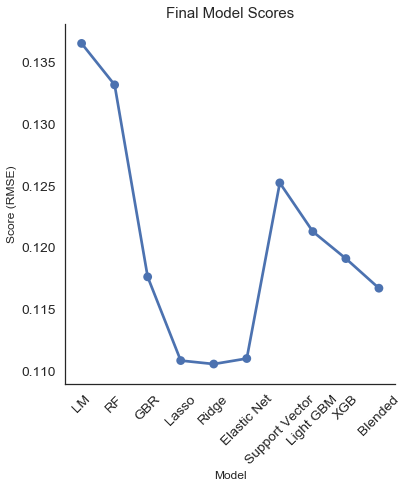

In [232]:
# Create figure space
sns.set_style("white")

# Create catplot
ax = sns.catplot(x='Model',
                 y='Score',
                 data=scorelist_df,
                 kind='point',
                 height=6) 

# Set plot features
plt.xticks(rotation='45')
plt.title('Final Model Scores', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score (RMSE)', fontsize=12)
plt.show()

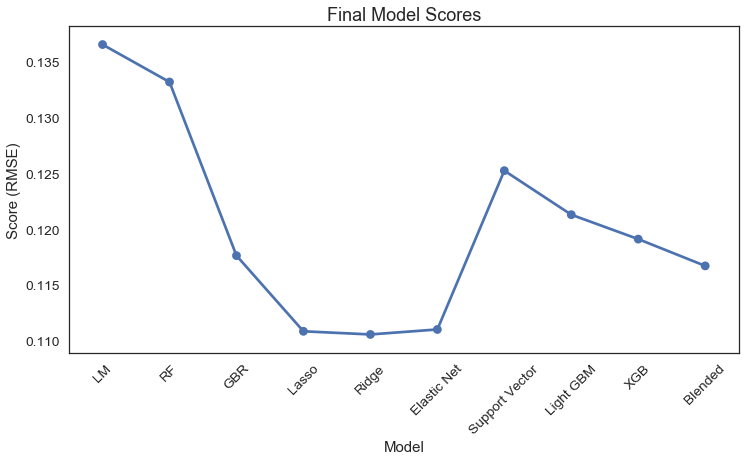

In [245]:
# Create figure space
sns.set_style("white")
plt.figure(figsize=(12,6))

# Create catplot
sns.pointplot(x='Model',
                 y='Score',
                 data=scorelist_df,
                 height=6) 

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

# Set plot features
plt.xticks(rotation='45')
plt.title('Final Model Scores', fontsize=18)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Score (RMSE)', fontsize=15)
plt.show()


In [260]:
# del initial_scores_df
# del sorted_initial_scores_df
# del scorelist
# del blended_score
# del scorelist_df

### Save notebook

In [263]:
# import dill
# dill.dump_session('09-house-regression-env.db')
# dill.load_session('09-house-regression-env.db')

### cannot pickle Dict key error
If you're using python3 , add list() to category_index.values() in model_lib.py about line 381 as this list(category_index.values()).